# Boxplots

In [1]:
executed_yet = False

In [2]:
import os

if not executed_yet:
    executed_yet = True
    original_working_directory_path = os.getcwd()
    os.chdir(os.path.join(original_working_directory_path, "../.."))
    root_working_directory_path =  os.getcwd()
    
print(f'Original working directory: {original_working_directory_path}')
print(f'Current working directory: {root_working_directory_path}')

Original working directory: /Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code/prototypes/prototype_02
Current working directory: /Users/jankreischer/Library/Mobile Documents/com~apple~CloudDocs/Master-Thesis/Code


In [3]:
from src.data_provider import DataProvider
training_data, test_data, _ = DataProvider.get_scaled_train_test_split(pi=3, scaling_minmax=True, scale_normal_only=False)

type(rdf): <class 'pandas.core.frame.DataFrame'>
rdf.columns: Index(['cpuUser', 'block:block_bio_remap', 'block:block_getrq',
       'block:block_unplug', 'fib:fib_table_lookup',
       'filemap:mm_filemap_add_to_page_cache', 'gpio:gpio_value',
       'ipi:ipi_raise', 'jbd2:jbd2_handle_start', 'kmem:kfree', 'kmem:kmalloc',
       'kmem:mm_page_alloc_zone_locked', 'kmem:mm_page_pcpu_drain',
       'mmc:mmc_request_start', 'net:net_dev_queue', 'net:net_dev_xmit',
       'net:netif_rx', 'page-faults', 'pagemap:mm_lru_insertion',
       'qdisc:qdisc_dequeue', 'random:get_random_bytes',
       'random:mix_pool_bytes_nolock', 'rpm:rpm_resume', 'rpm:rpm_suspend',
       'sched:sched_process_exec', 'sched:sched_process_free',
       'sched:sched_process_wait', 'signal:signal_deliver',
       'signal:signal_generate', 'skb:kfree_skb',
       'skb:skb_copy_datagram_iovec', 'task:task_newtask',
       'tcp:tcp_destroy_sock', 'tcp:tcp_probe', 'timer:timer_start',
       'workqueue:workqueue_activa

In [52]:
feature_names = [
    'cpuUser', 
    'block_bio_remap',
    'block_getrq',
    'block_unplug', 
    'fib_table_lookup',
    'mm_filemap_add_to_page_cache',
    'gpio_value',
    'ipi_raise',
    'jbd2_handle_start',
    'kfree',
    'kmalloc',
    'mm_page_alloc_zone_locked',
    'mm_page_pcpu_drain',
    'mmc_request_start',
    'net_dev_queue',
    'net_dev_xmit',
    'netif_rx',
    'page-faults',
    'mm_lru_insertion',
    'qdisc_dequeue',
    'get_random_bytes',
    'mix_pool_bytes_nolock',
    'rpm_resume',
    'rpm_suspend',
    'sched_process_exec',
    'sched_process_free',
    'sched_process_wait',
    'signal_deliver',
    'signal_generate',
    'kfree_skb',
    'skb_copy_datagram_iovec',
    'task_newtask',
    'tcp_destroy_sock',
    'tcp_probe',
    'timer_start',
    'workqueue_activate_work',
    'sb_clear_inode_writeback',
    'wbc_writepage',
    'writeback_dirty_inode',
    'writeback_dirty_inode_enqueue',
    'writeback_dirty_page',
    'writeback_mark_inode_dirty',
    'writeback_pages_written',
    'writeback_single_inode',
    'writeback_write_inode',
    'writeback_written',
]

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

def comparison_box_plot(training_data, behavior_a, behavior_b, color_a='blue', color_b='red', plot="boxplot"):
    behavior_data_a = pd.DataFrame(training_data[behavior_a], columns=feature_names + ["attack"])
    behavior_data_a.columns =  behavior_data_a.columns + f" ({behavior_a.name})"
    
    behavior_data_b = pd.DataFrame(training_data[behavior_b], columns=feature_names + ["attack"])
    behavior_data_b.columns =  behavior_data_b.columns + f" ({behavior_b.name})"
    
    behavior_data = pd.concat([behavior_data_a, behavior_data_b])
    
    behavior_data = behavior_data.reindex(sorted(behavior_data.columns), axis=1)
    
    plt.figure(figsize=(15,30))
    if plot == "violinplot":
        sns.violinplot(behavior_data, orient="h", saturation=0.6, palette=[color_a, color_b], showmeans=True, scale='width')
    else:
        sns.boxplot(behavior_data, orient="h", saturation=1, palette=[color_a, color_b], showmeans=True, medianprops = dict(color = "black", linewidth = 1), showfliers = False, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
    plt.title(f"Boxplot Comparison ({behavior_a} vs. {behavior_b})")
    plt.show()

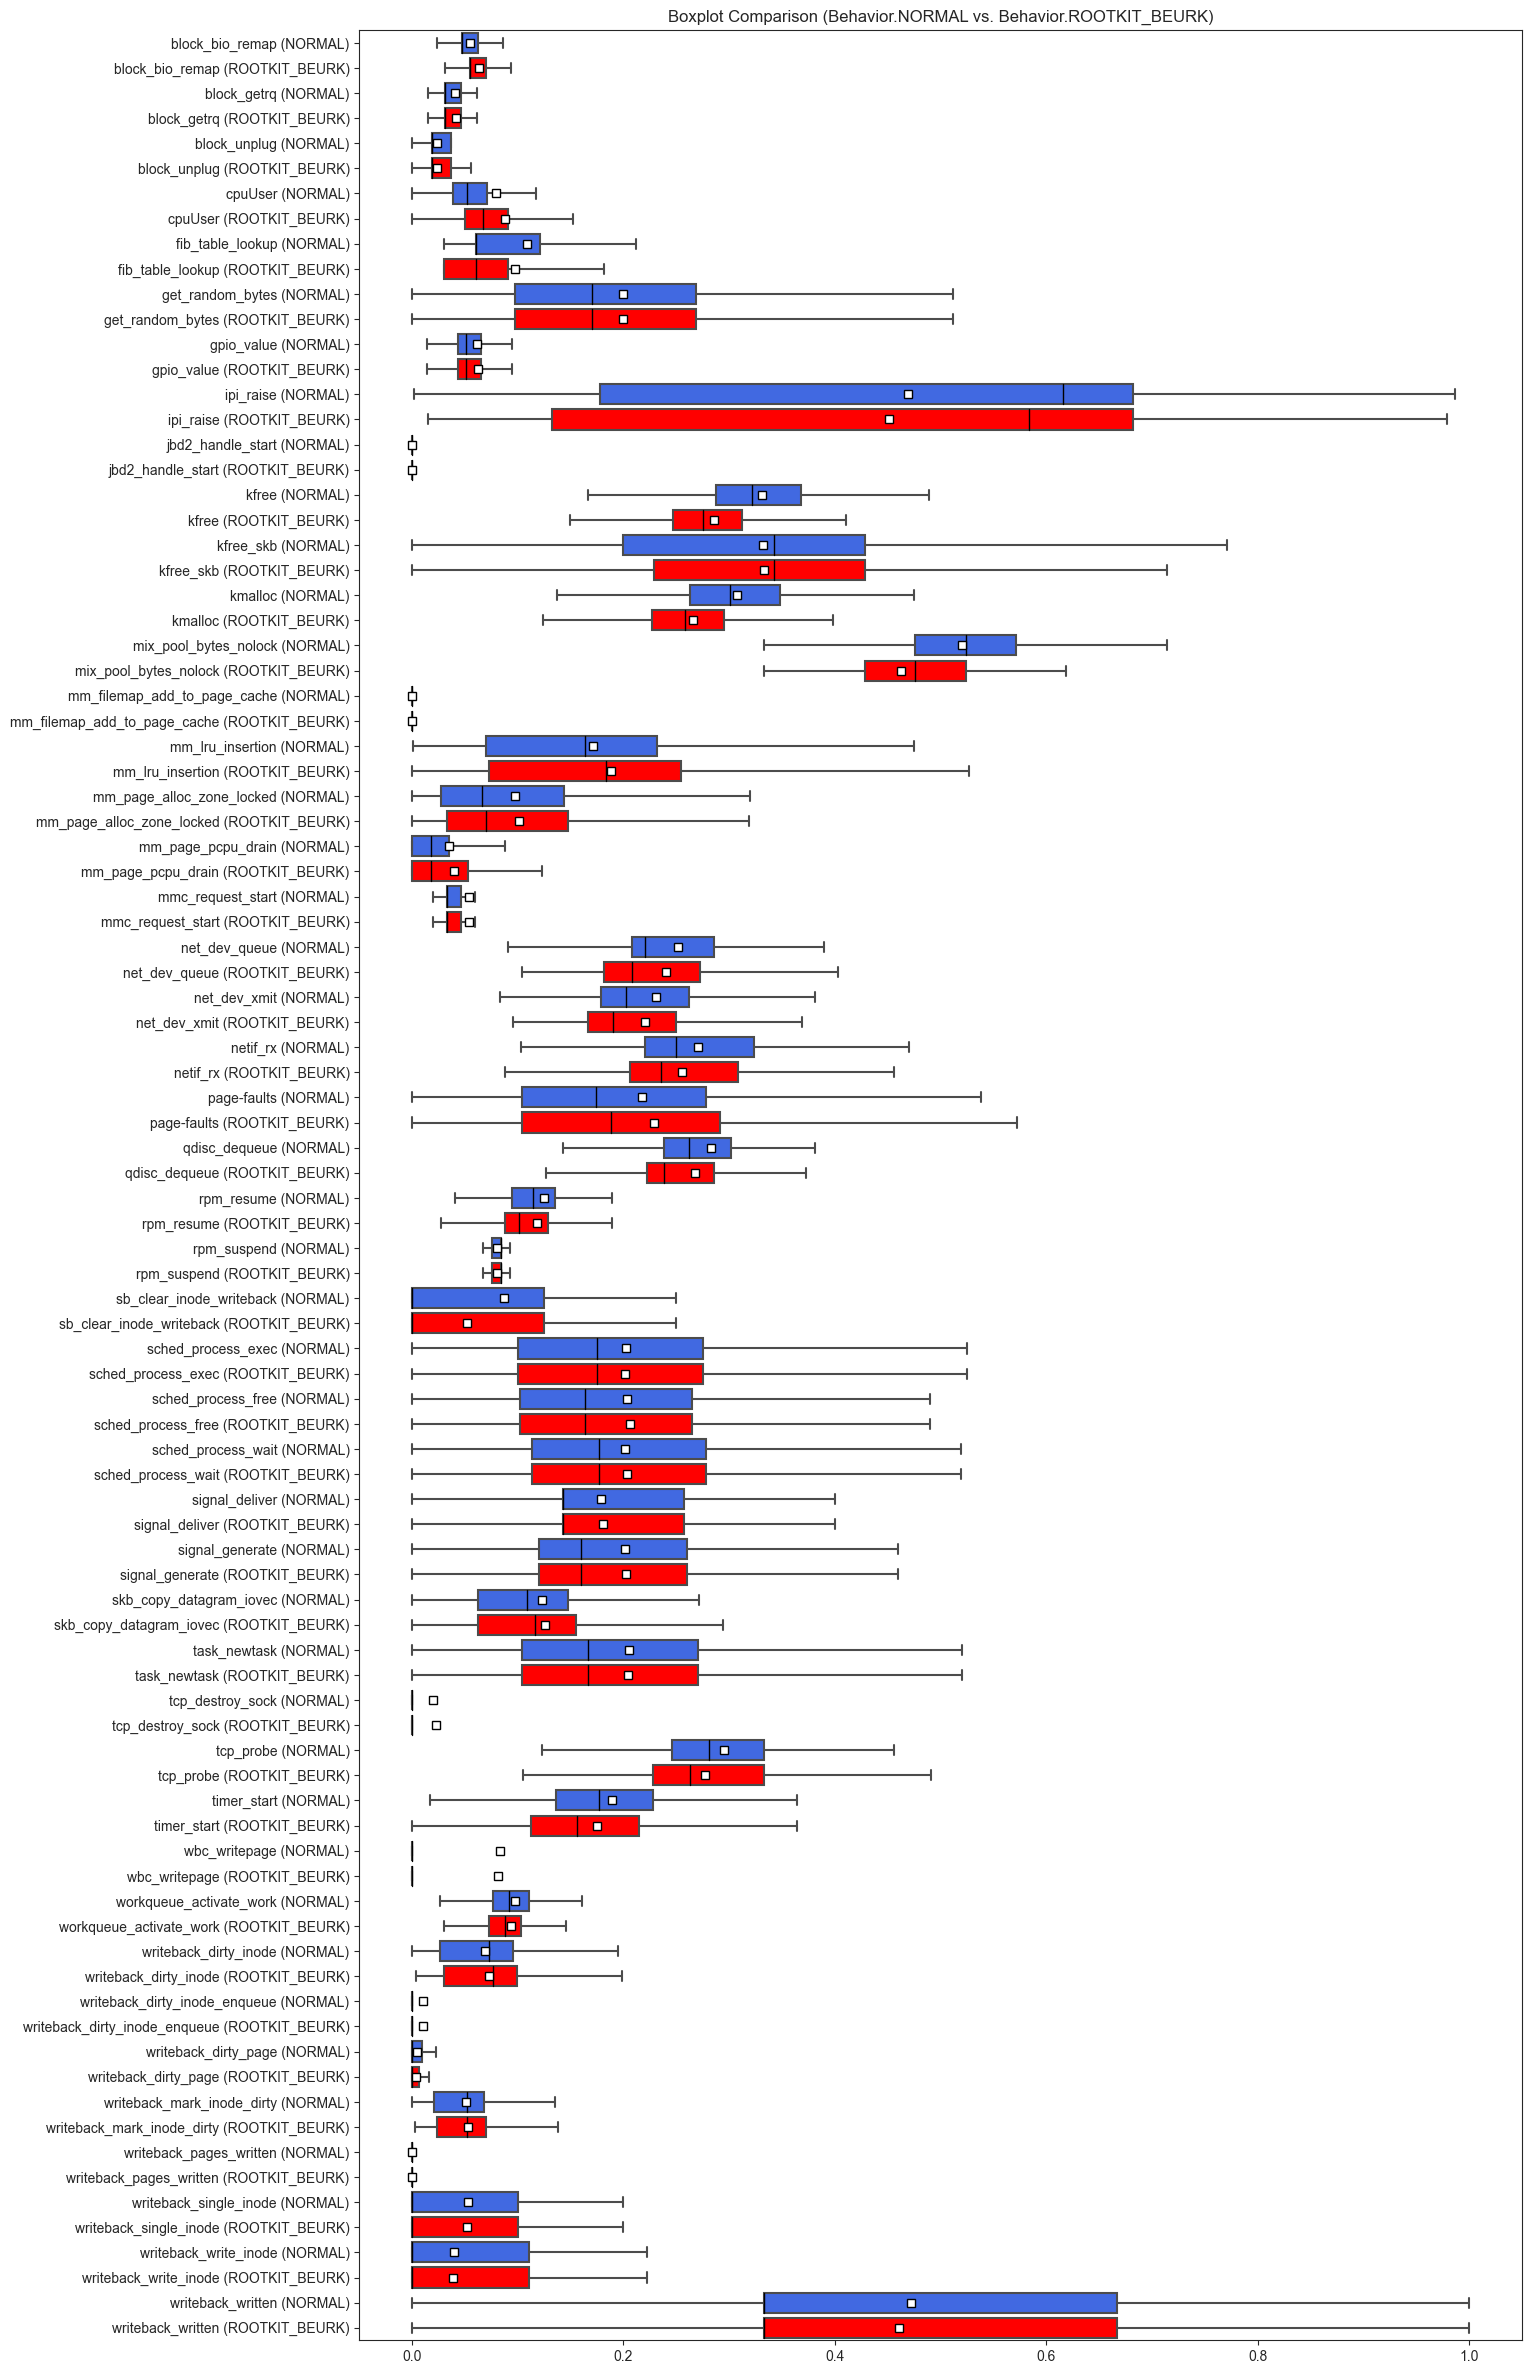

In [211]:
comparison_box_plot(training_data, Behavior.NORMAL, Behavior.ROOTKIT_BEURK, color_a='royalblue', color_b='red')

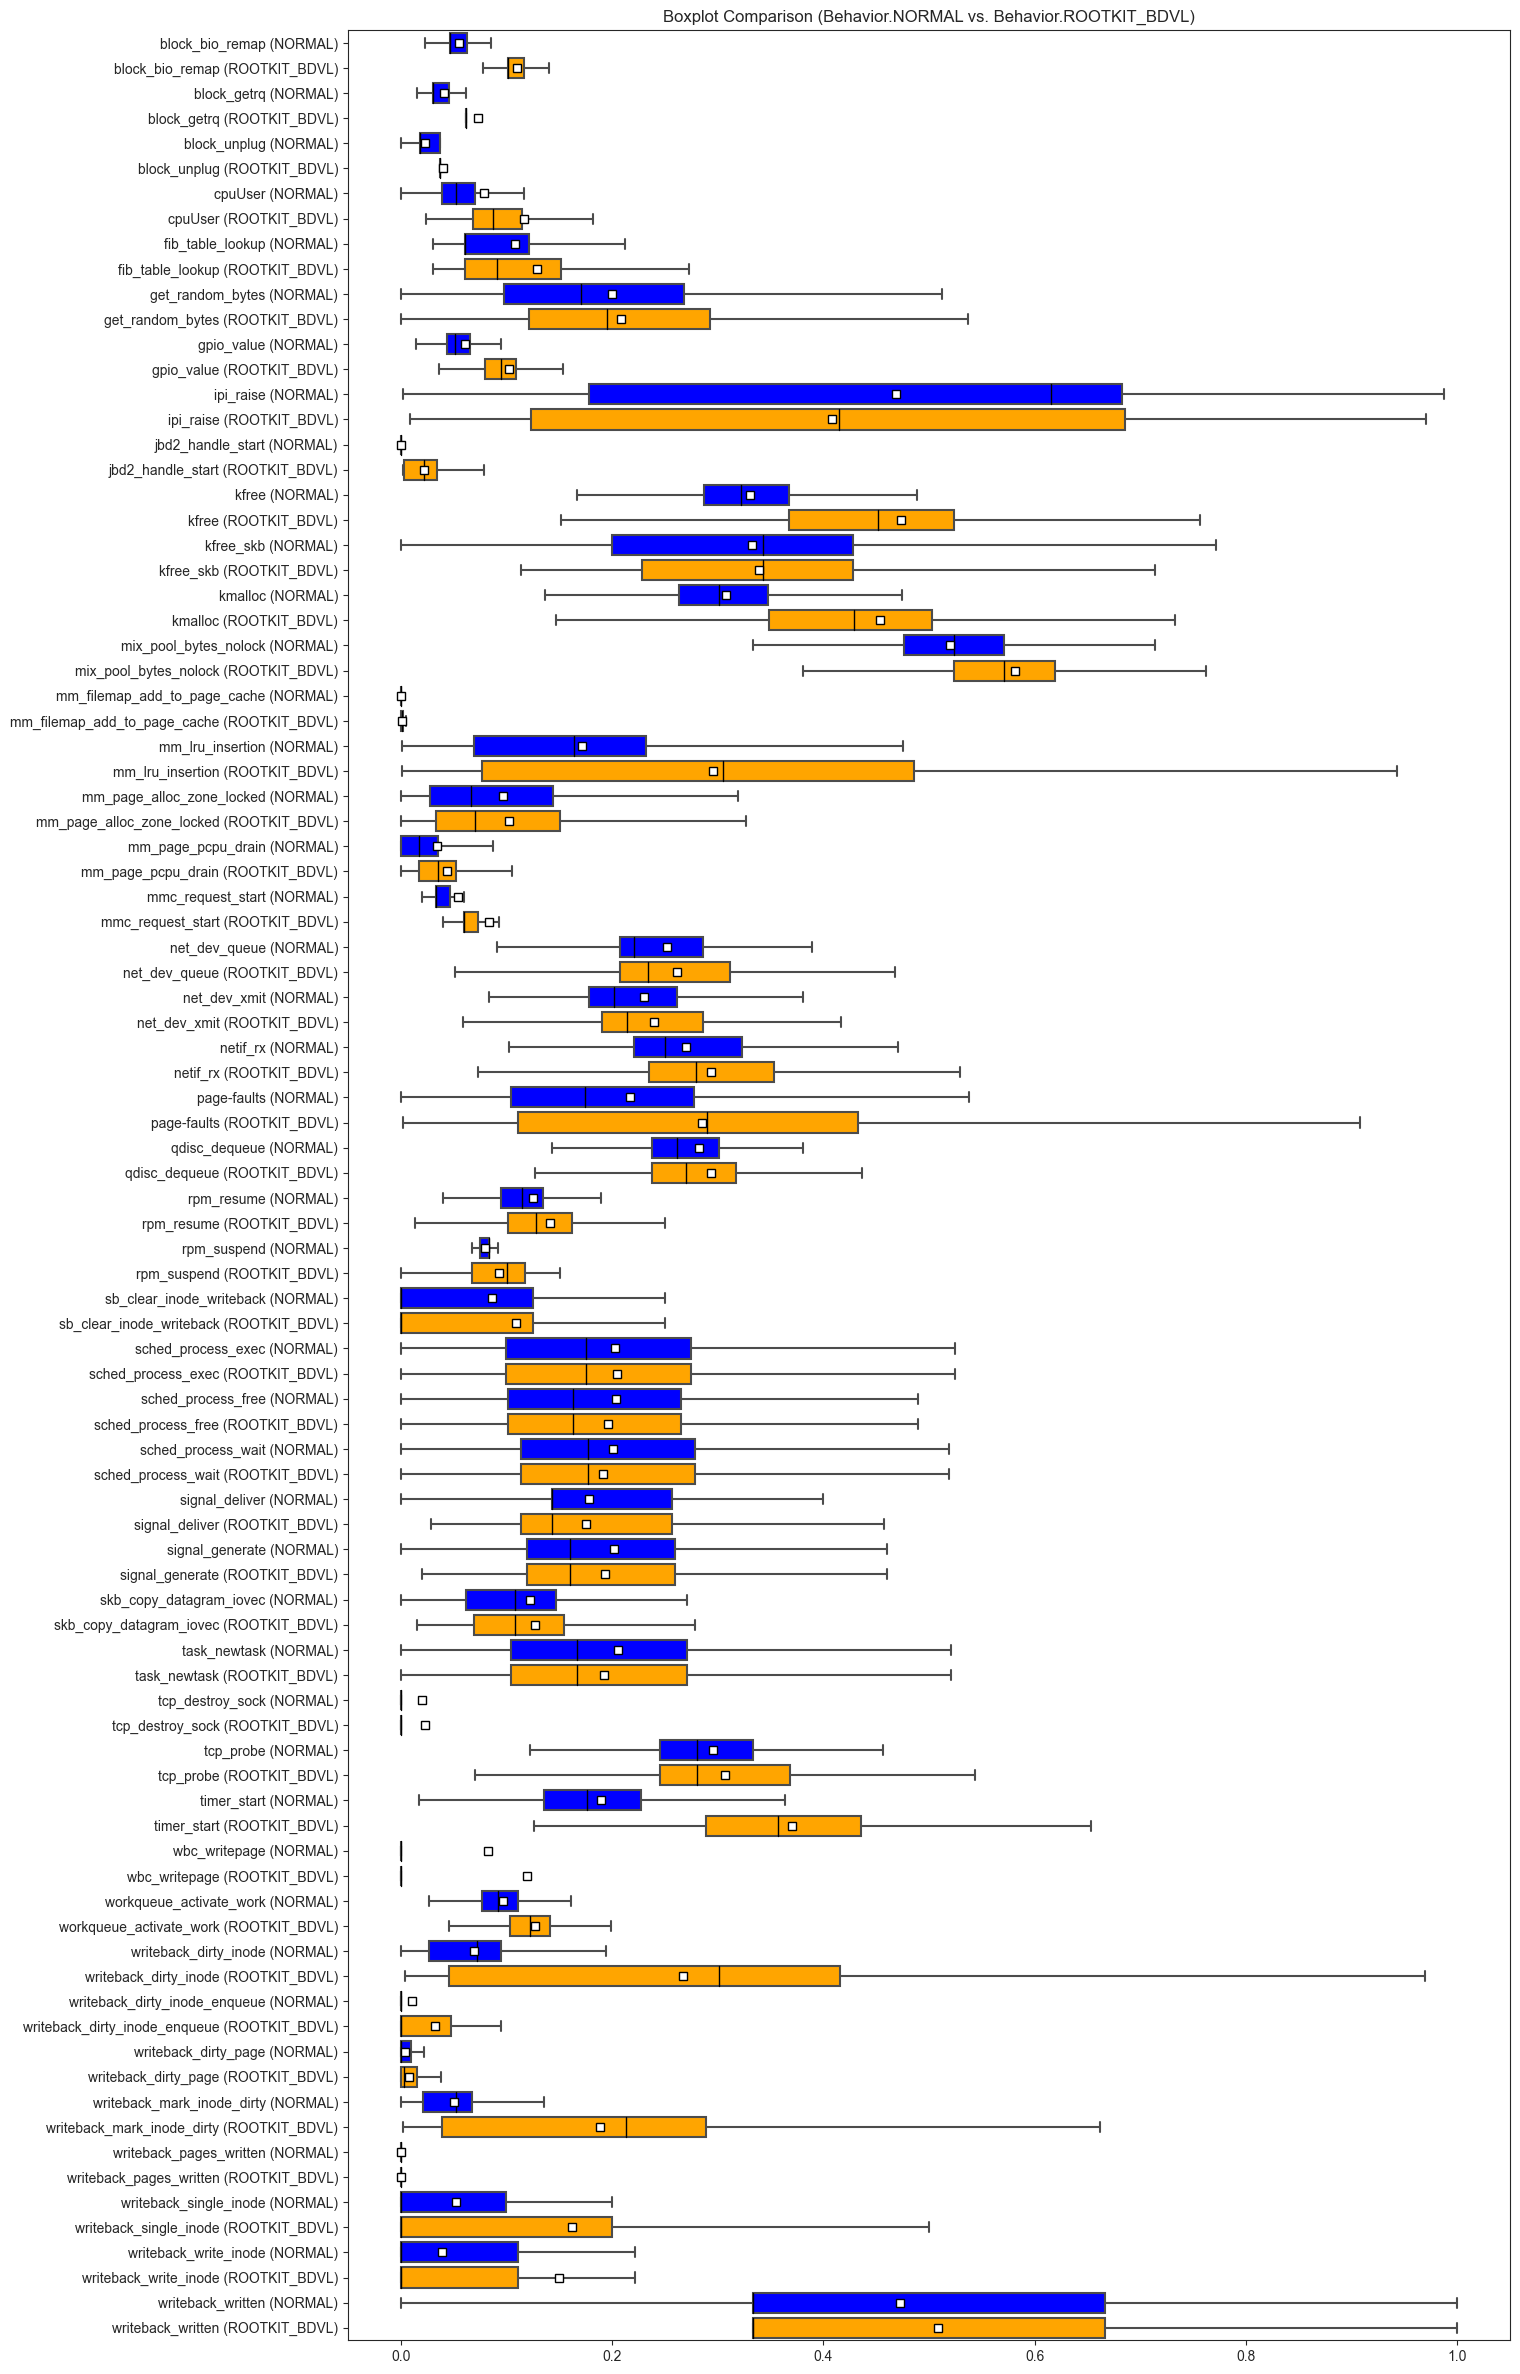

In [213]:
comparison_box_plot(training_data, Behavior.NORMAL, Behavior.ROOTKIT_BDVL, color_a='blue', color_b='orange', plot='boxplot')

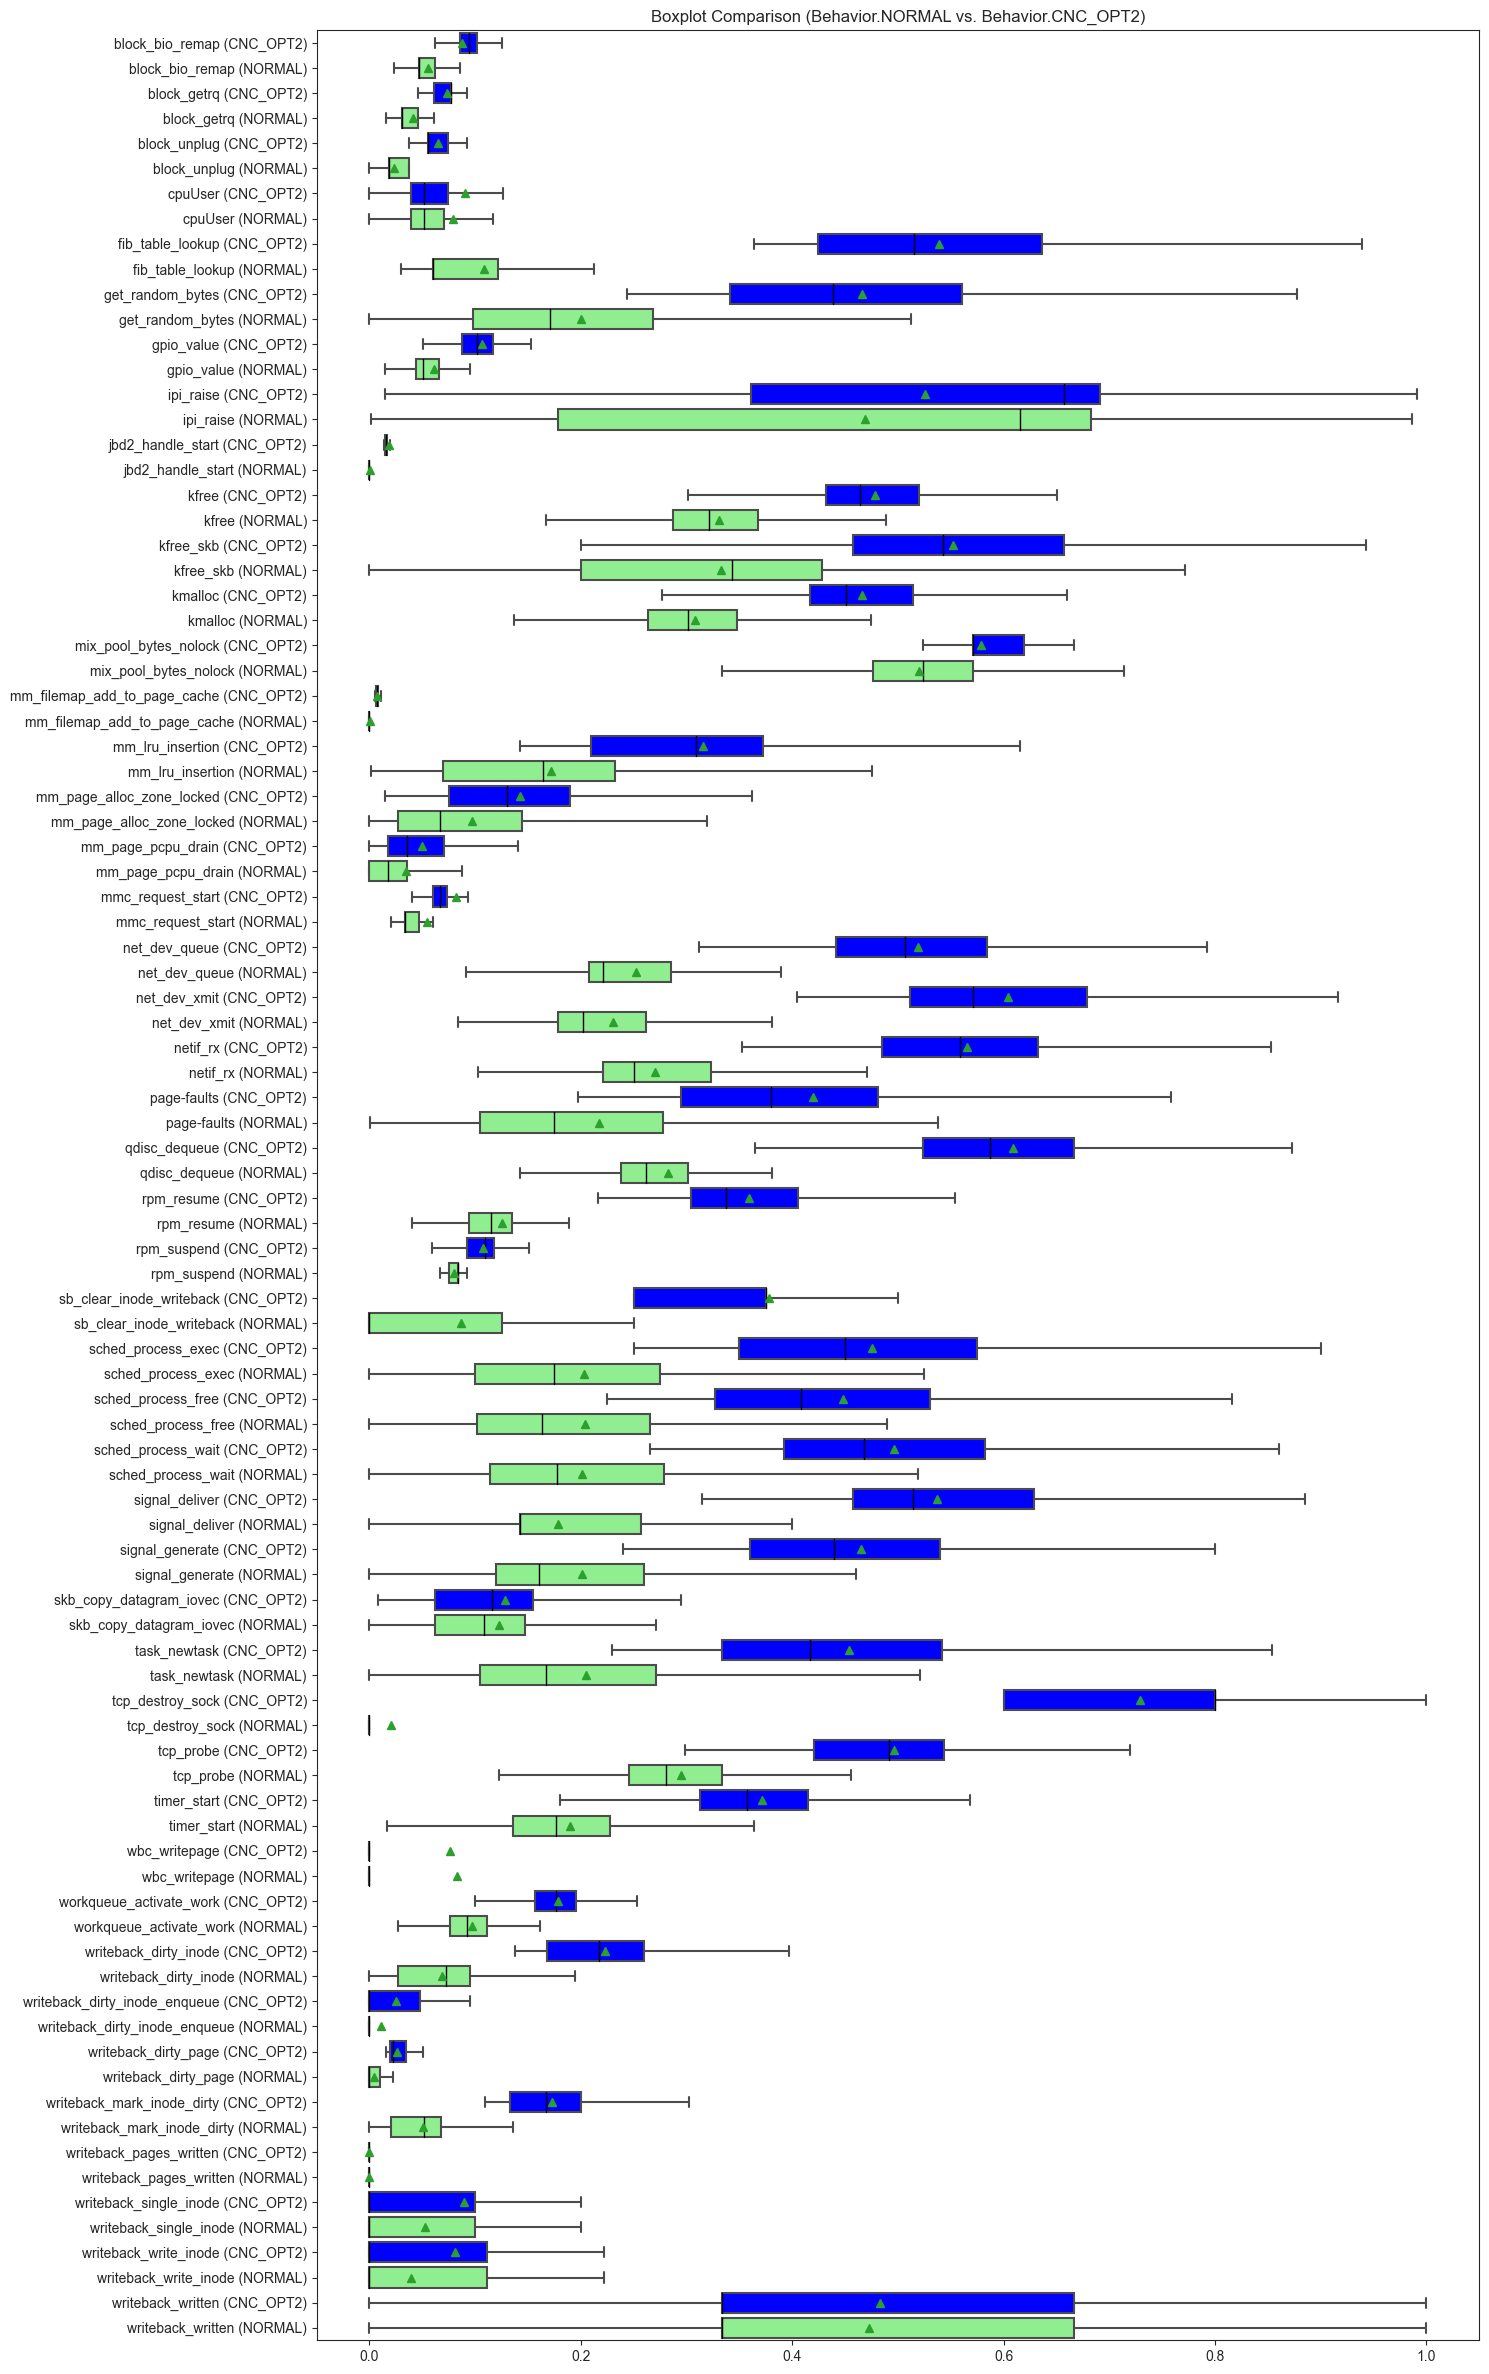

In [199]:
comparison_box_plot(training_data, Behavior.NORMAL, Behavior.CNC_OPT2, color_a='blue', color_b='lightgreen', plot='boxplot')

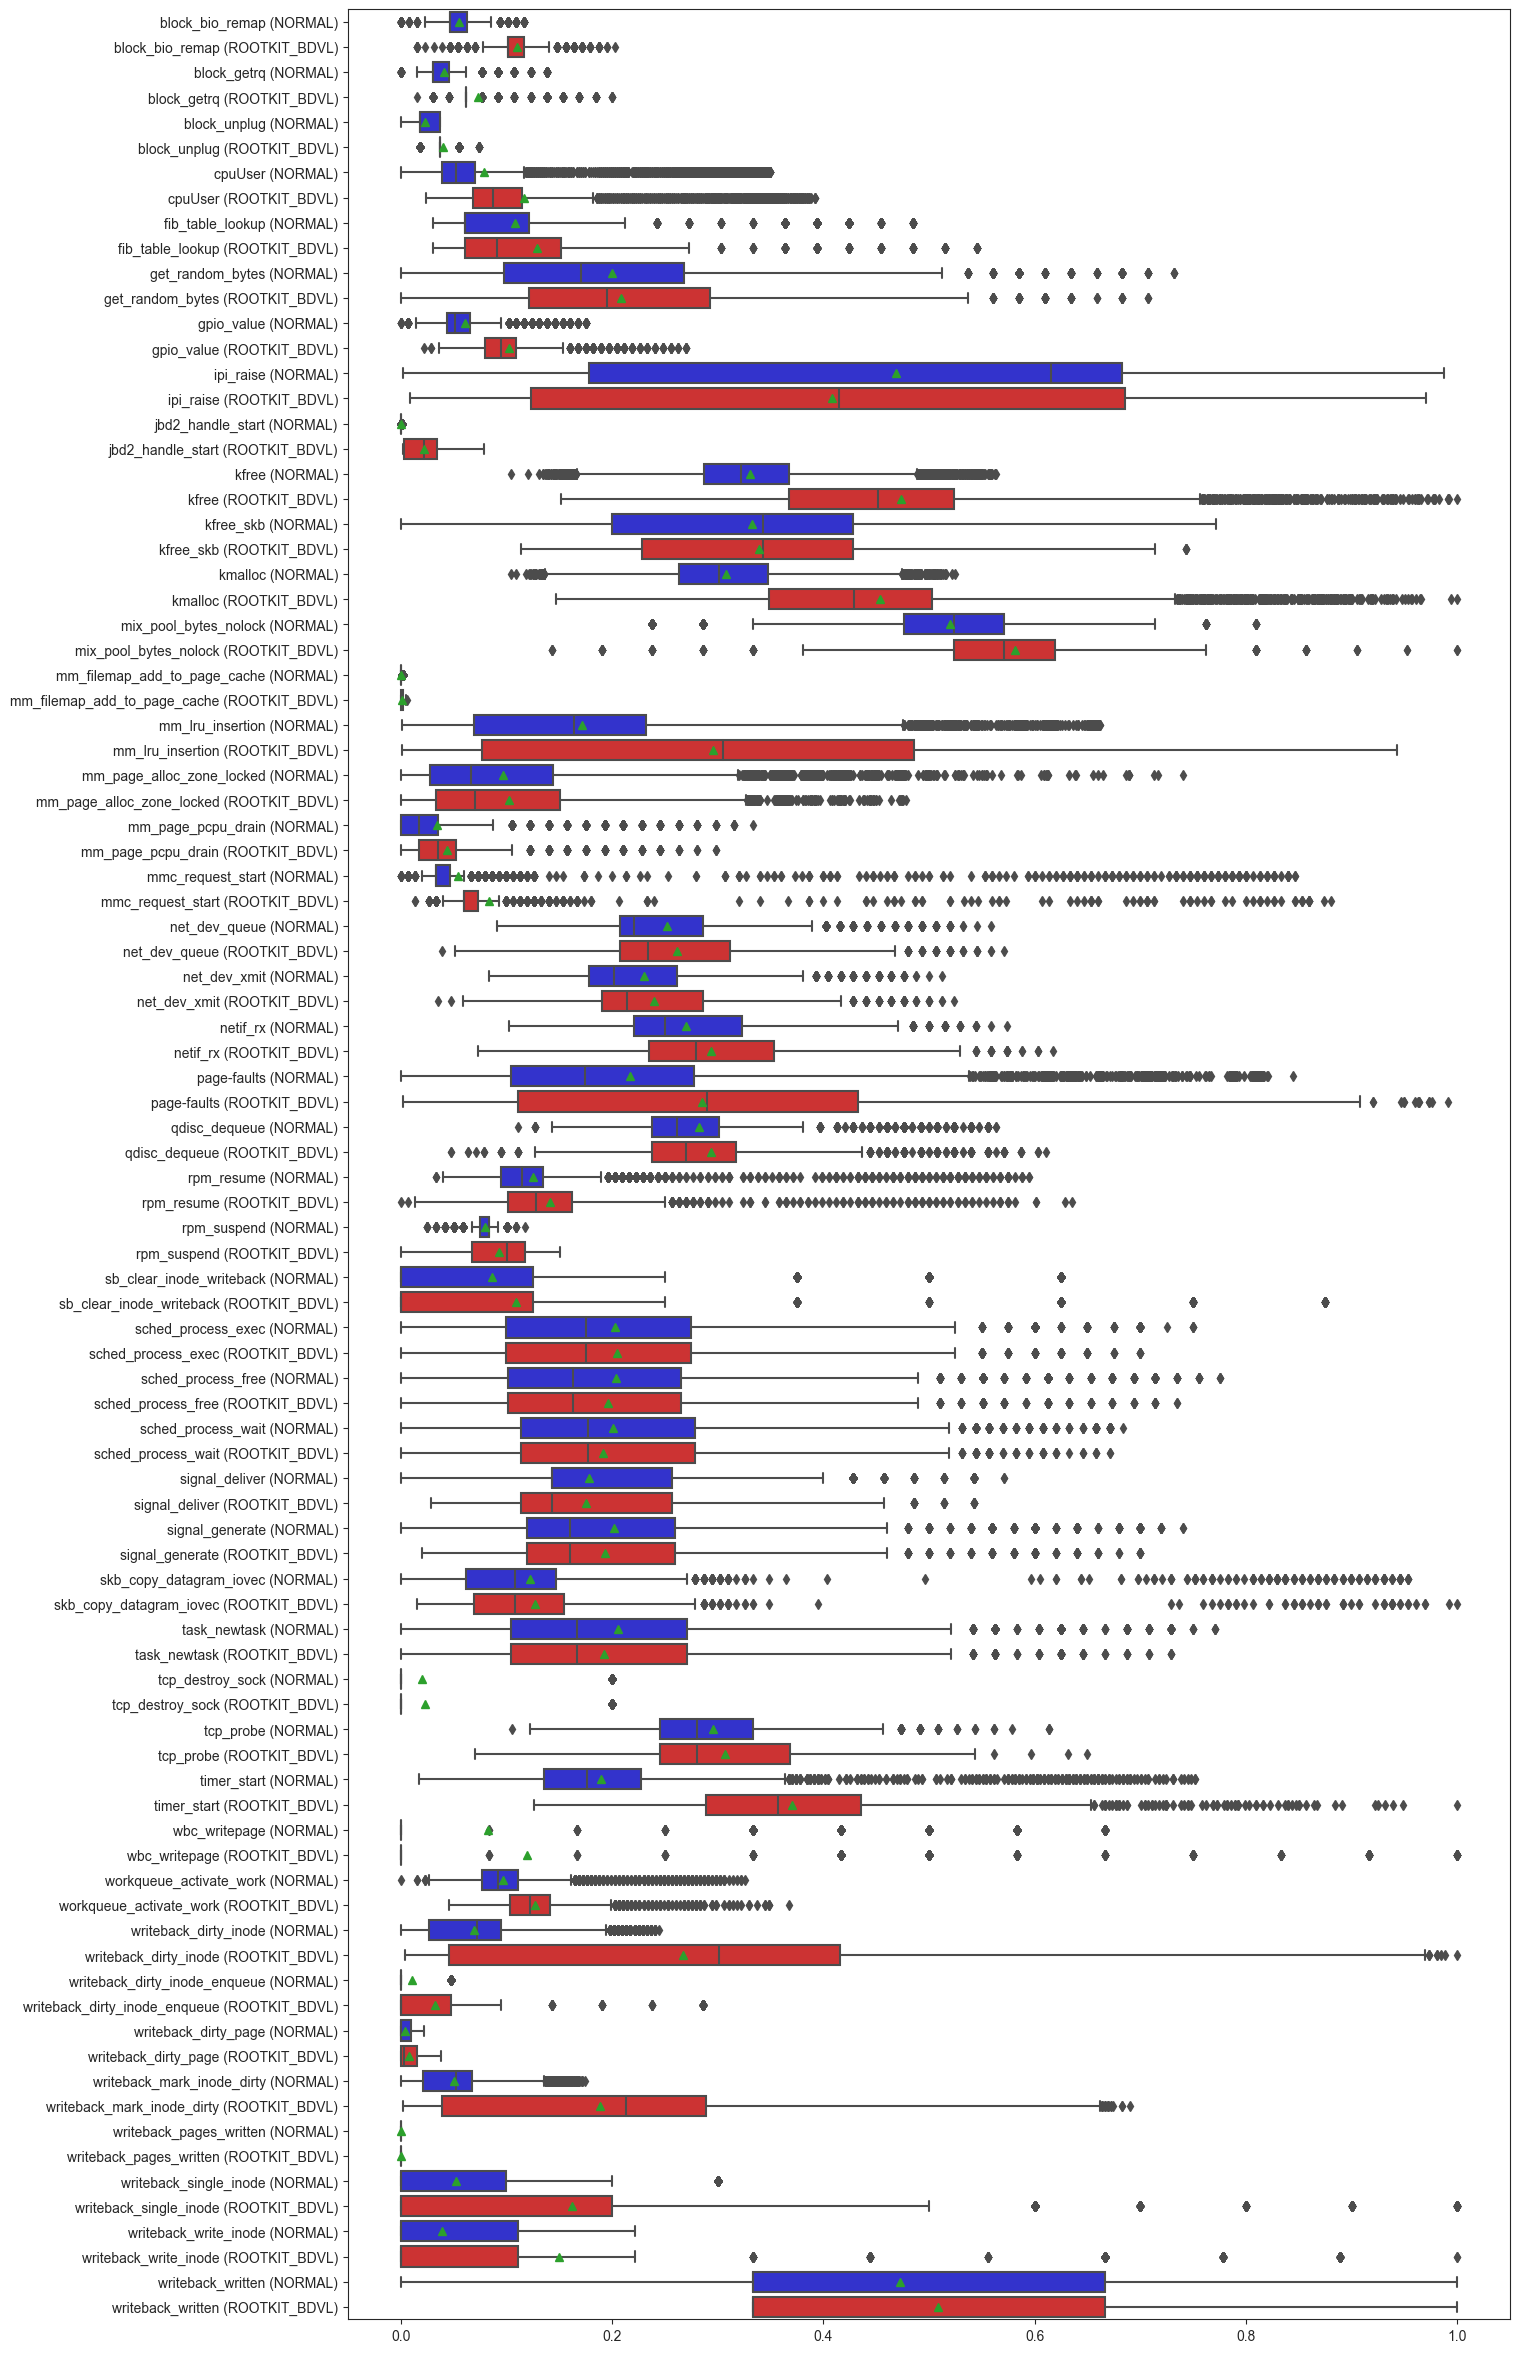

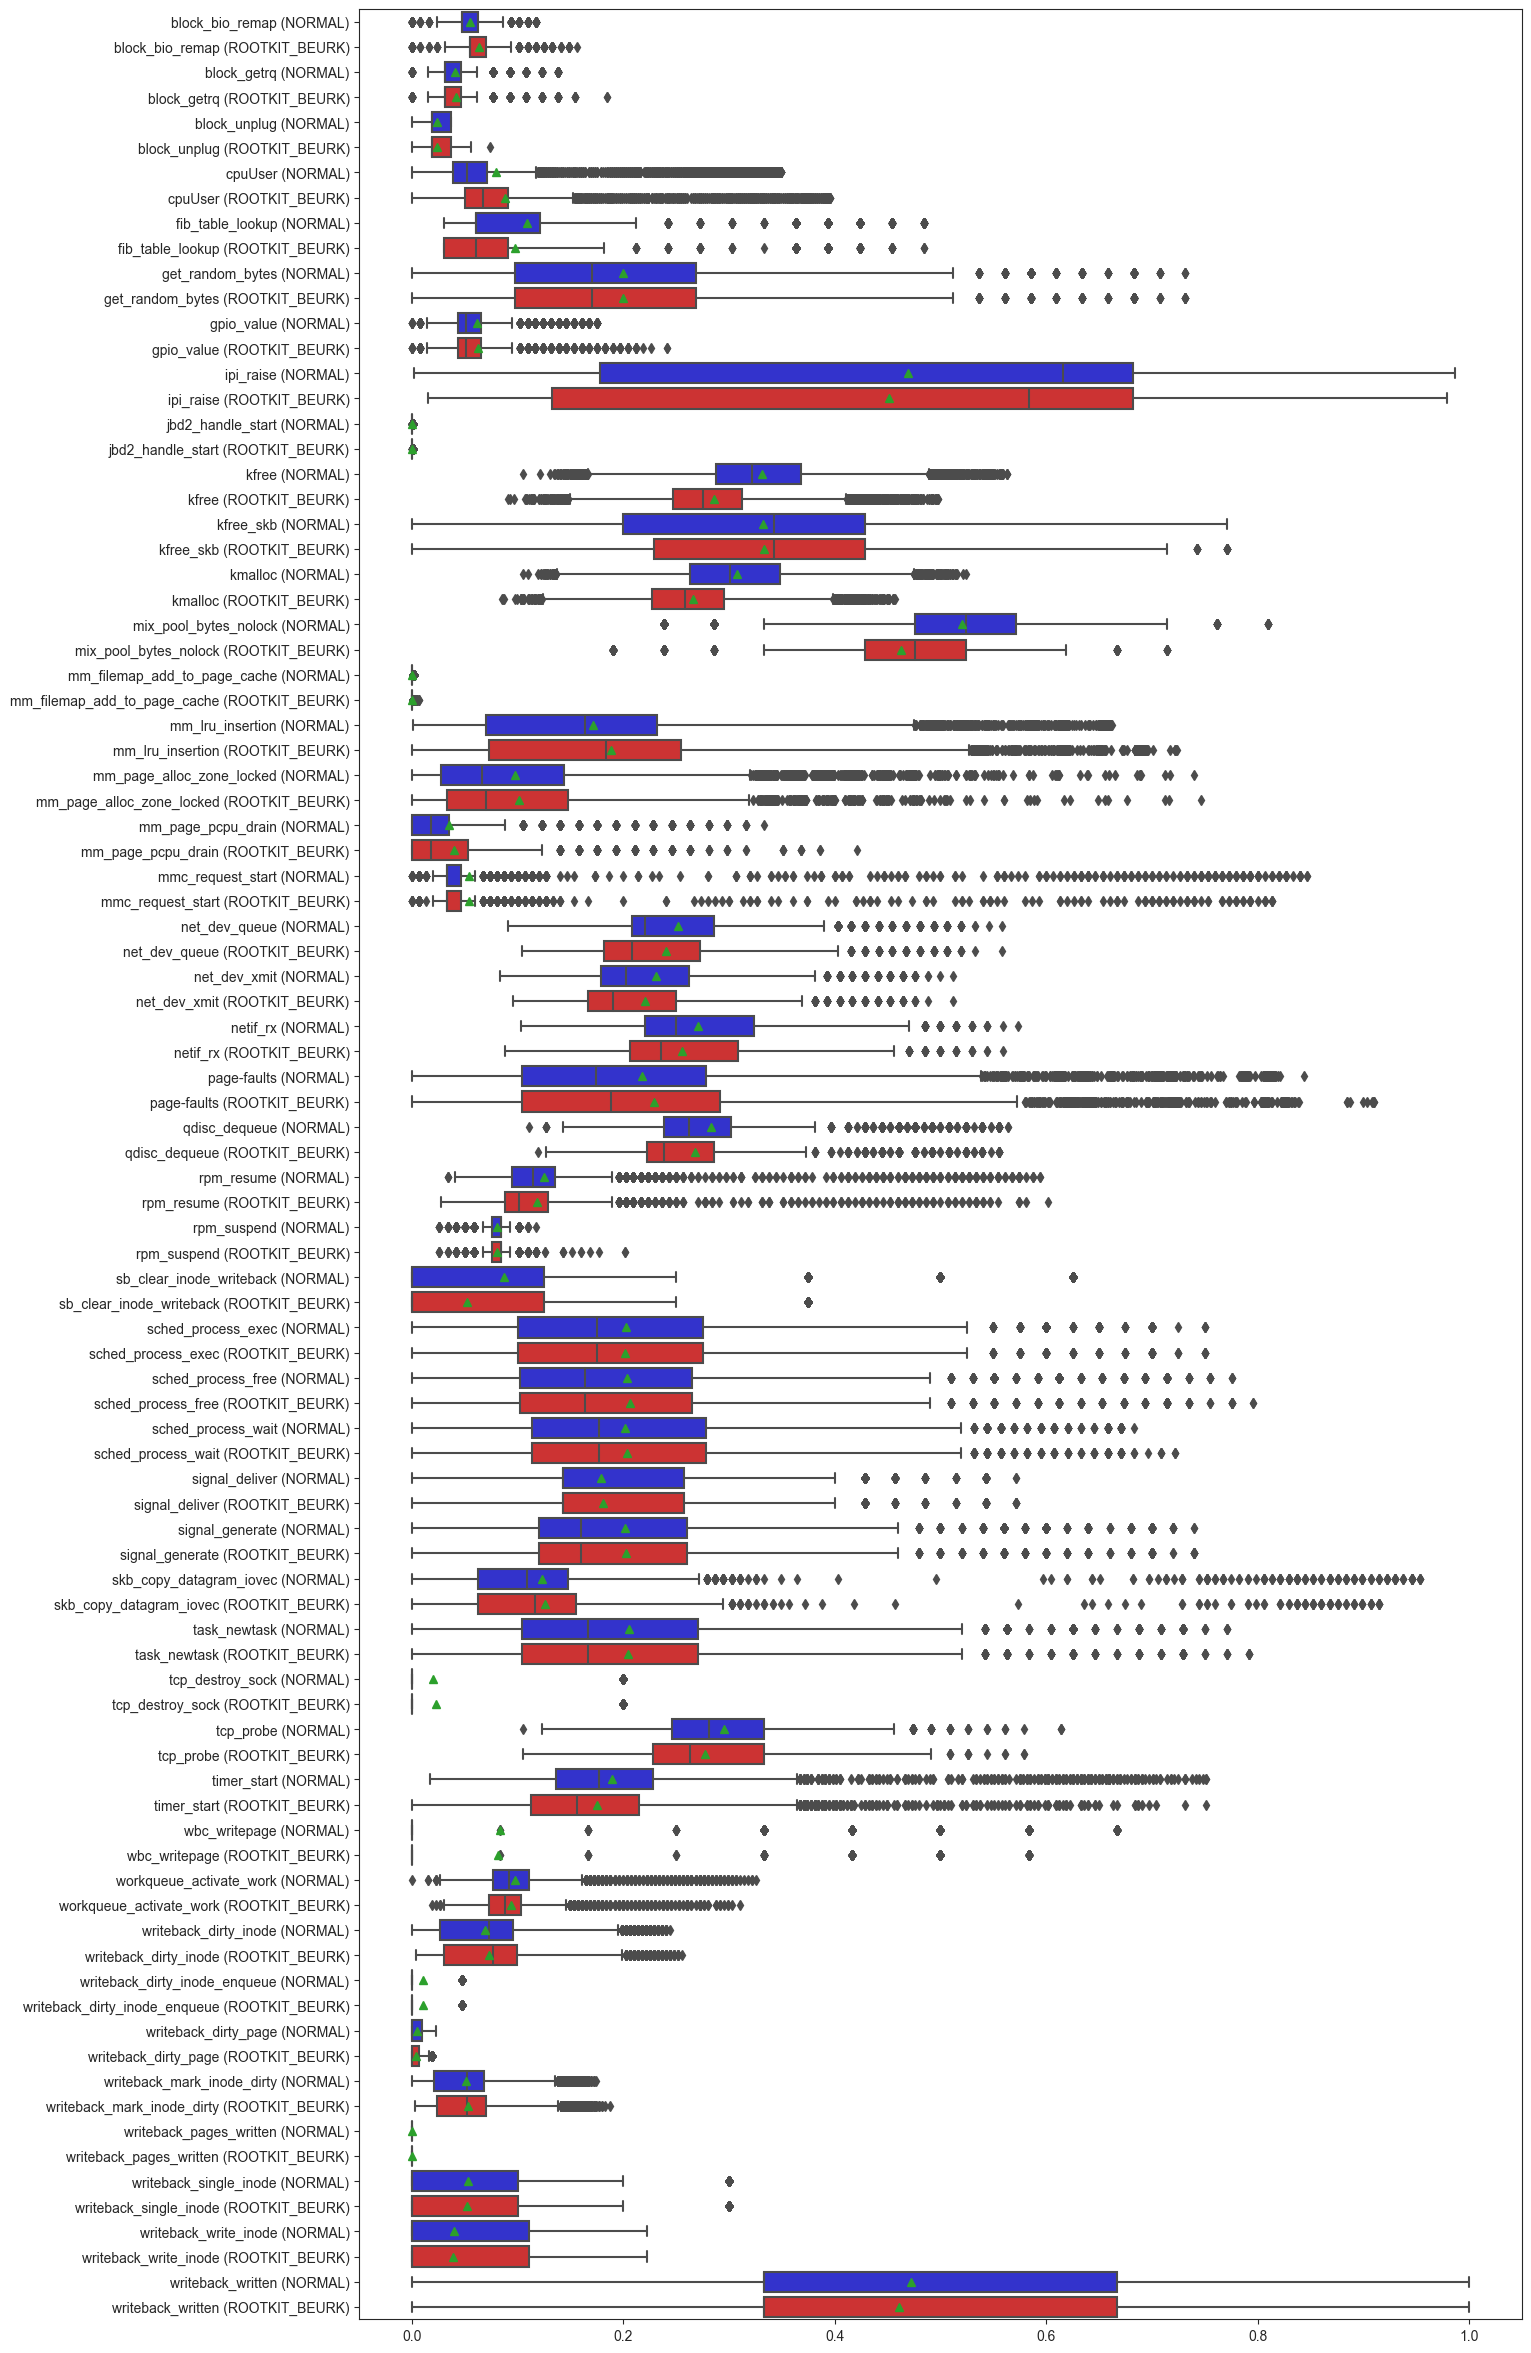

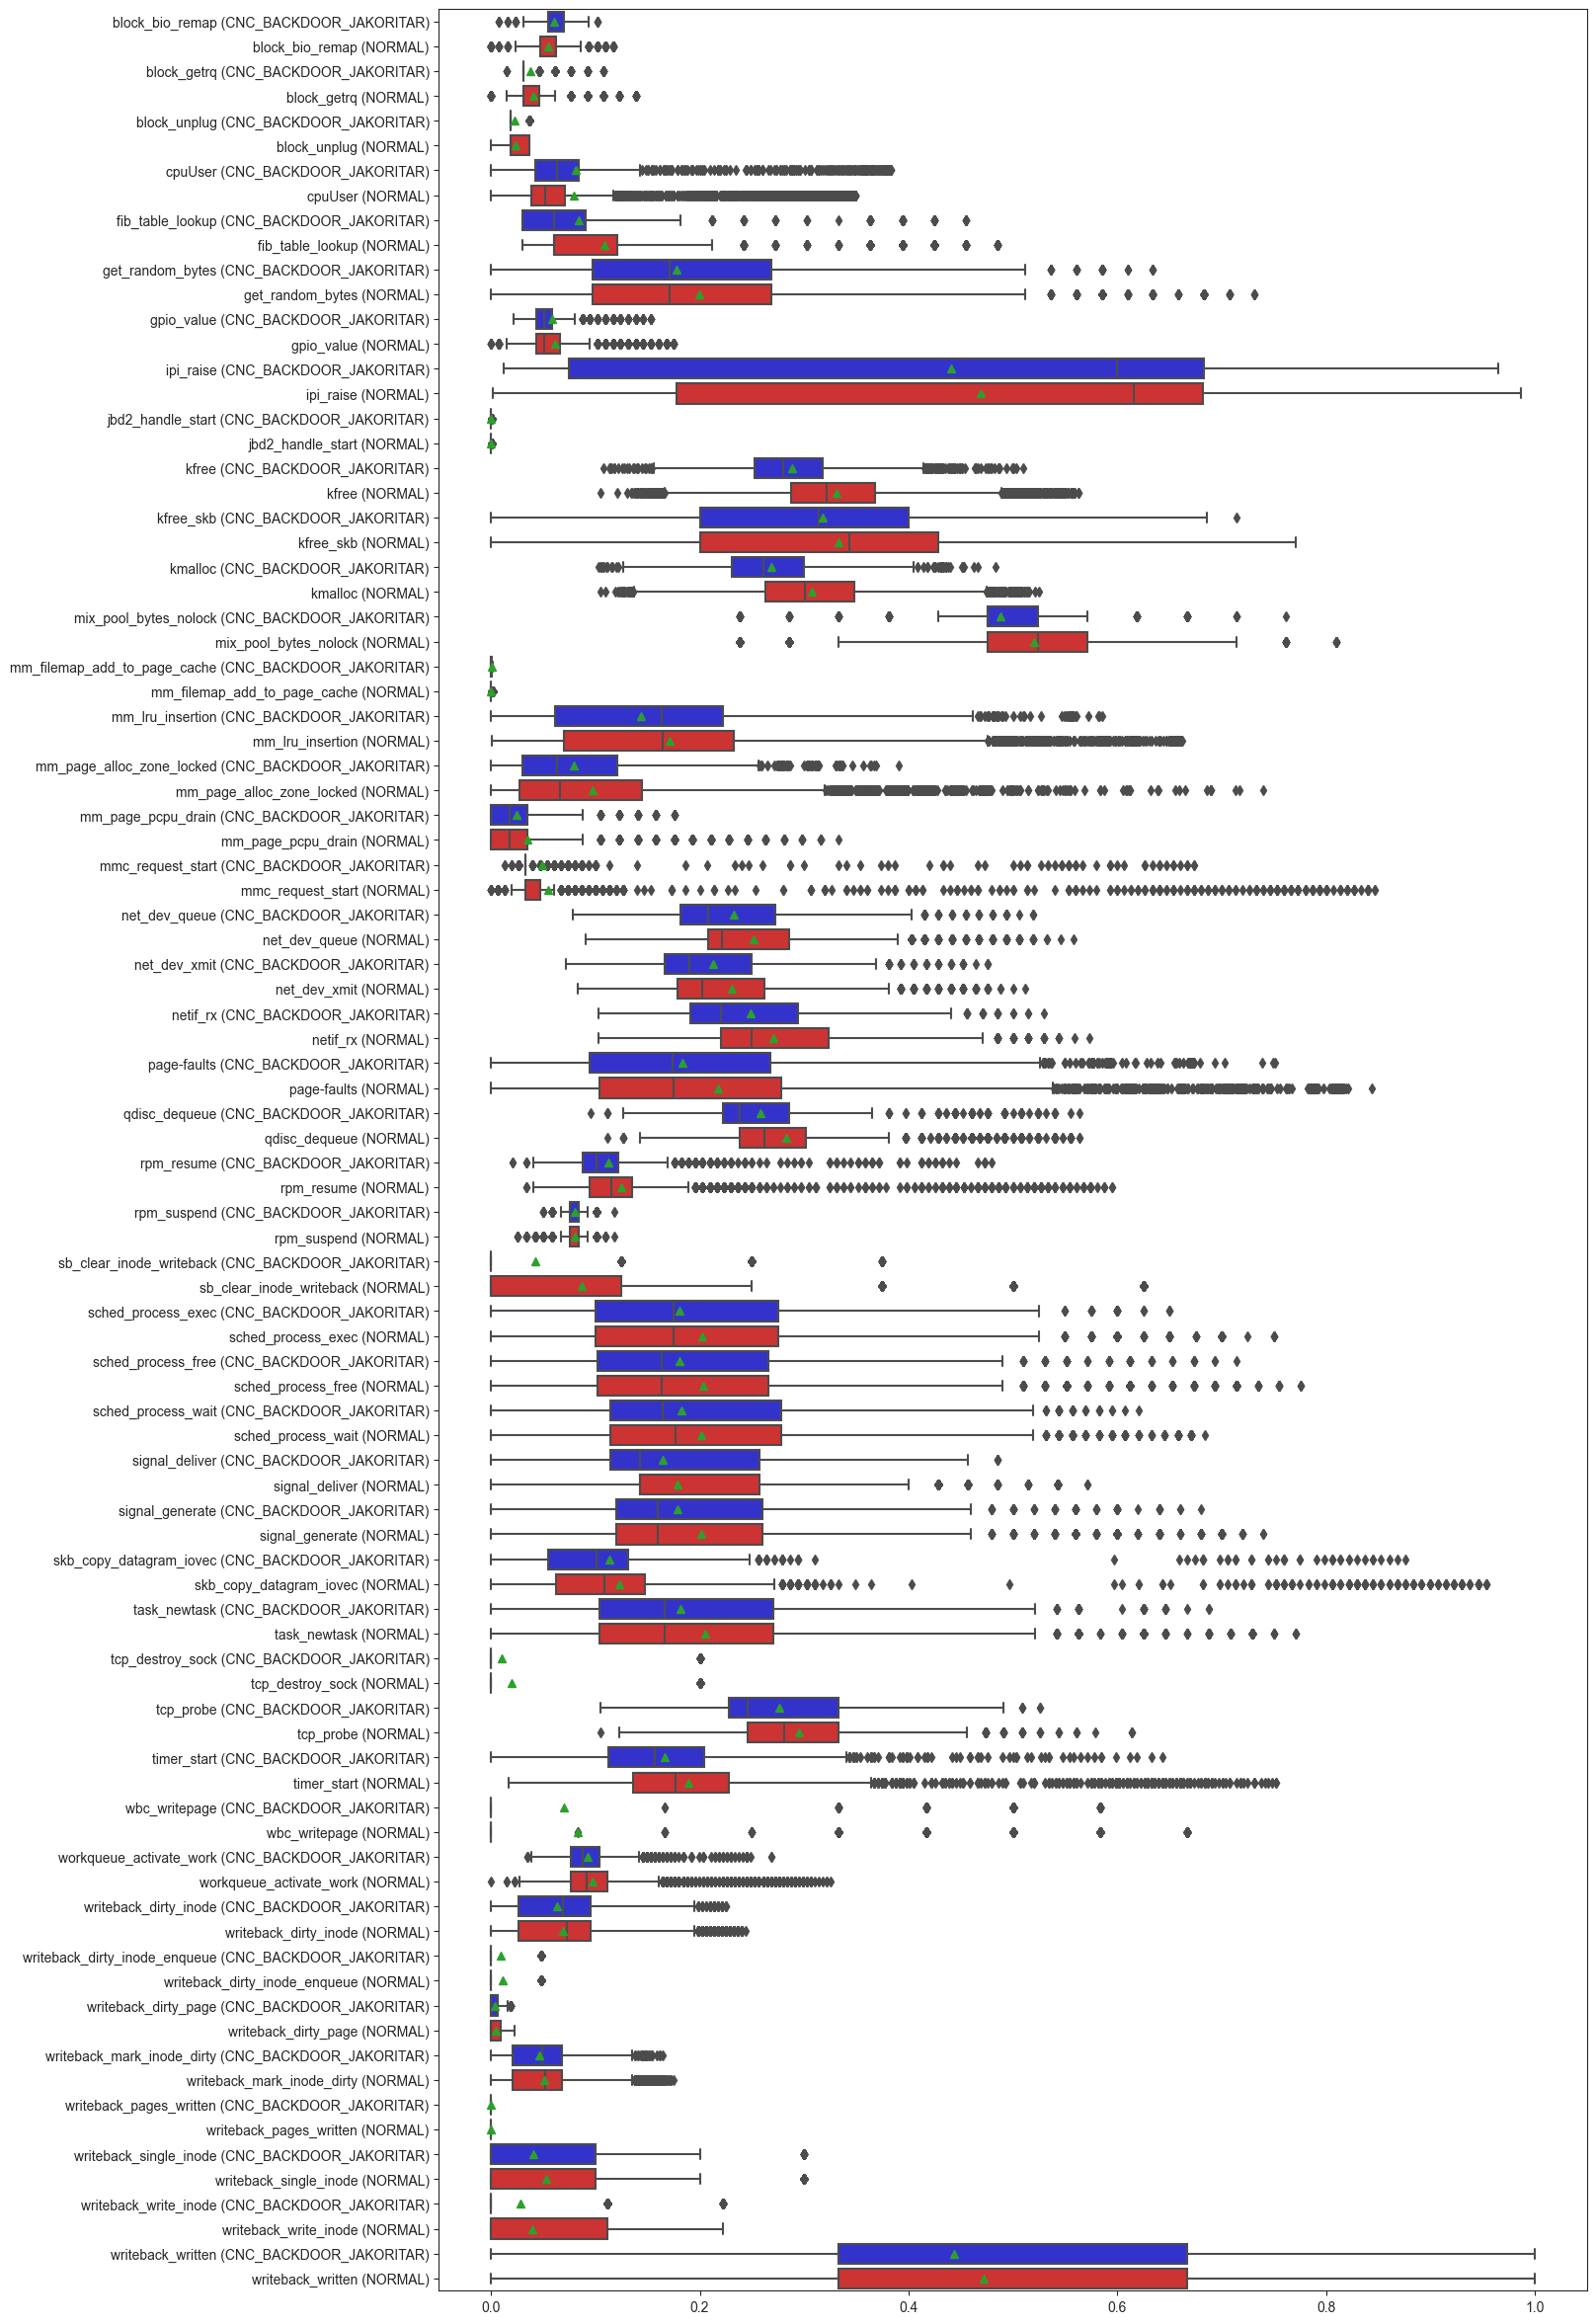

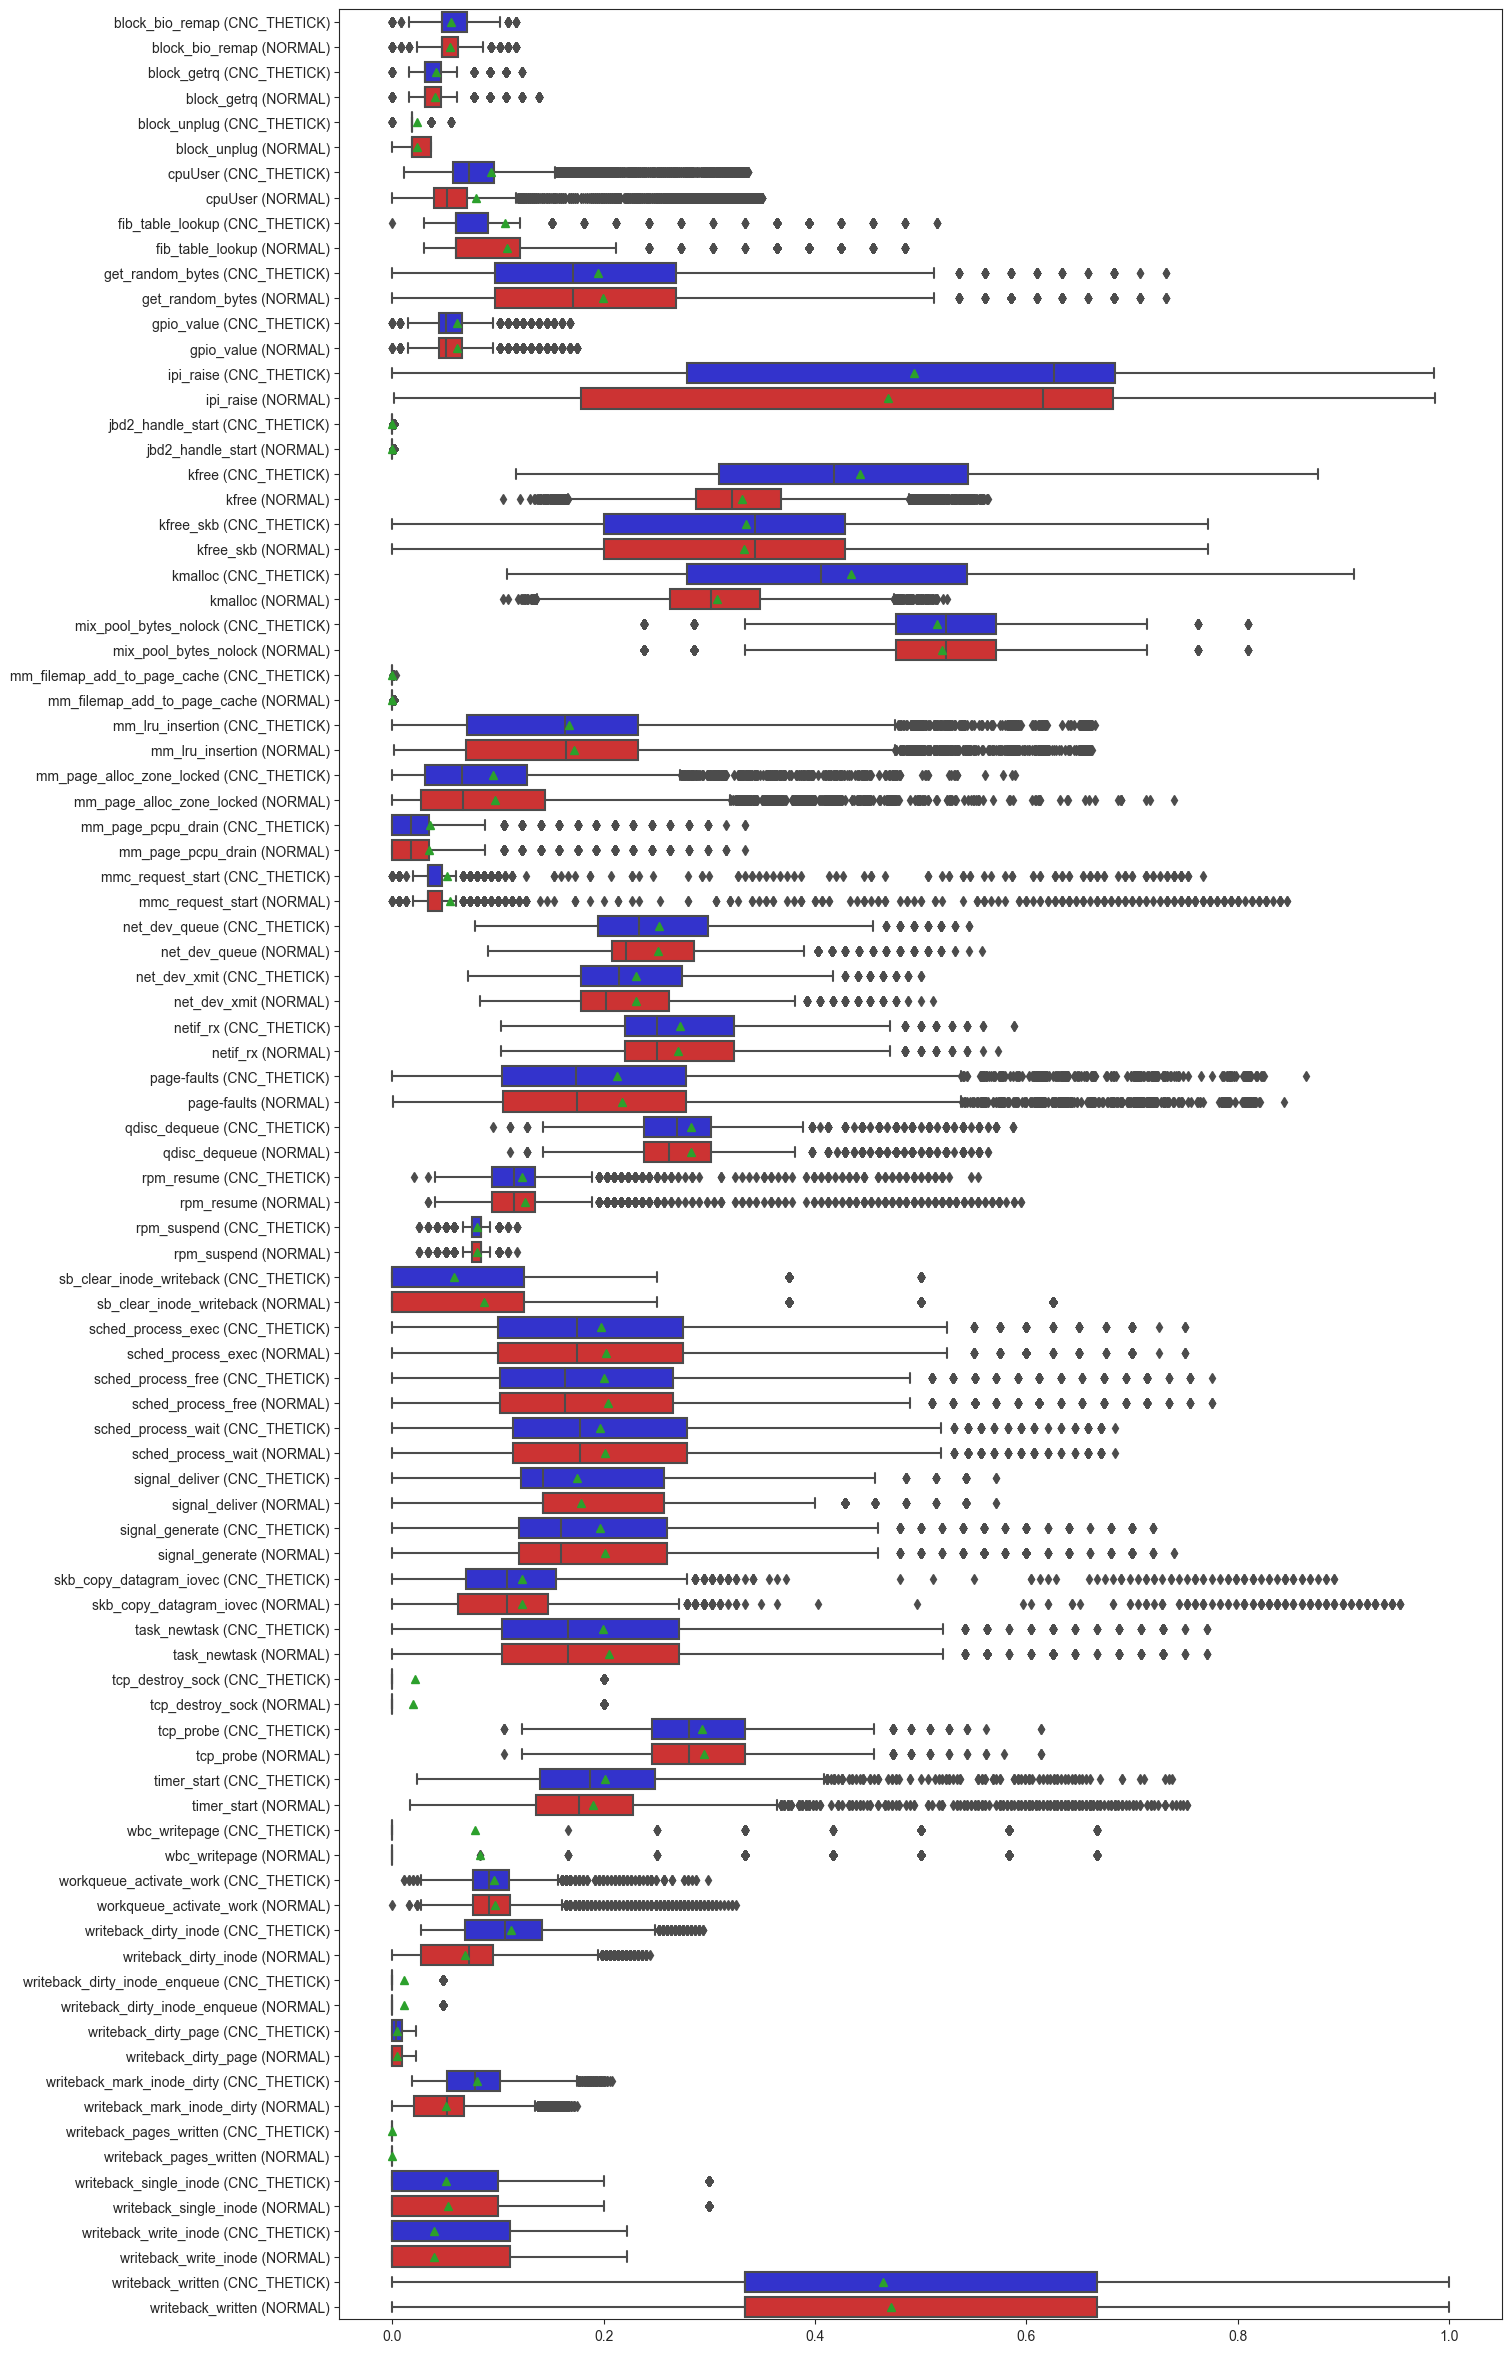

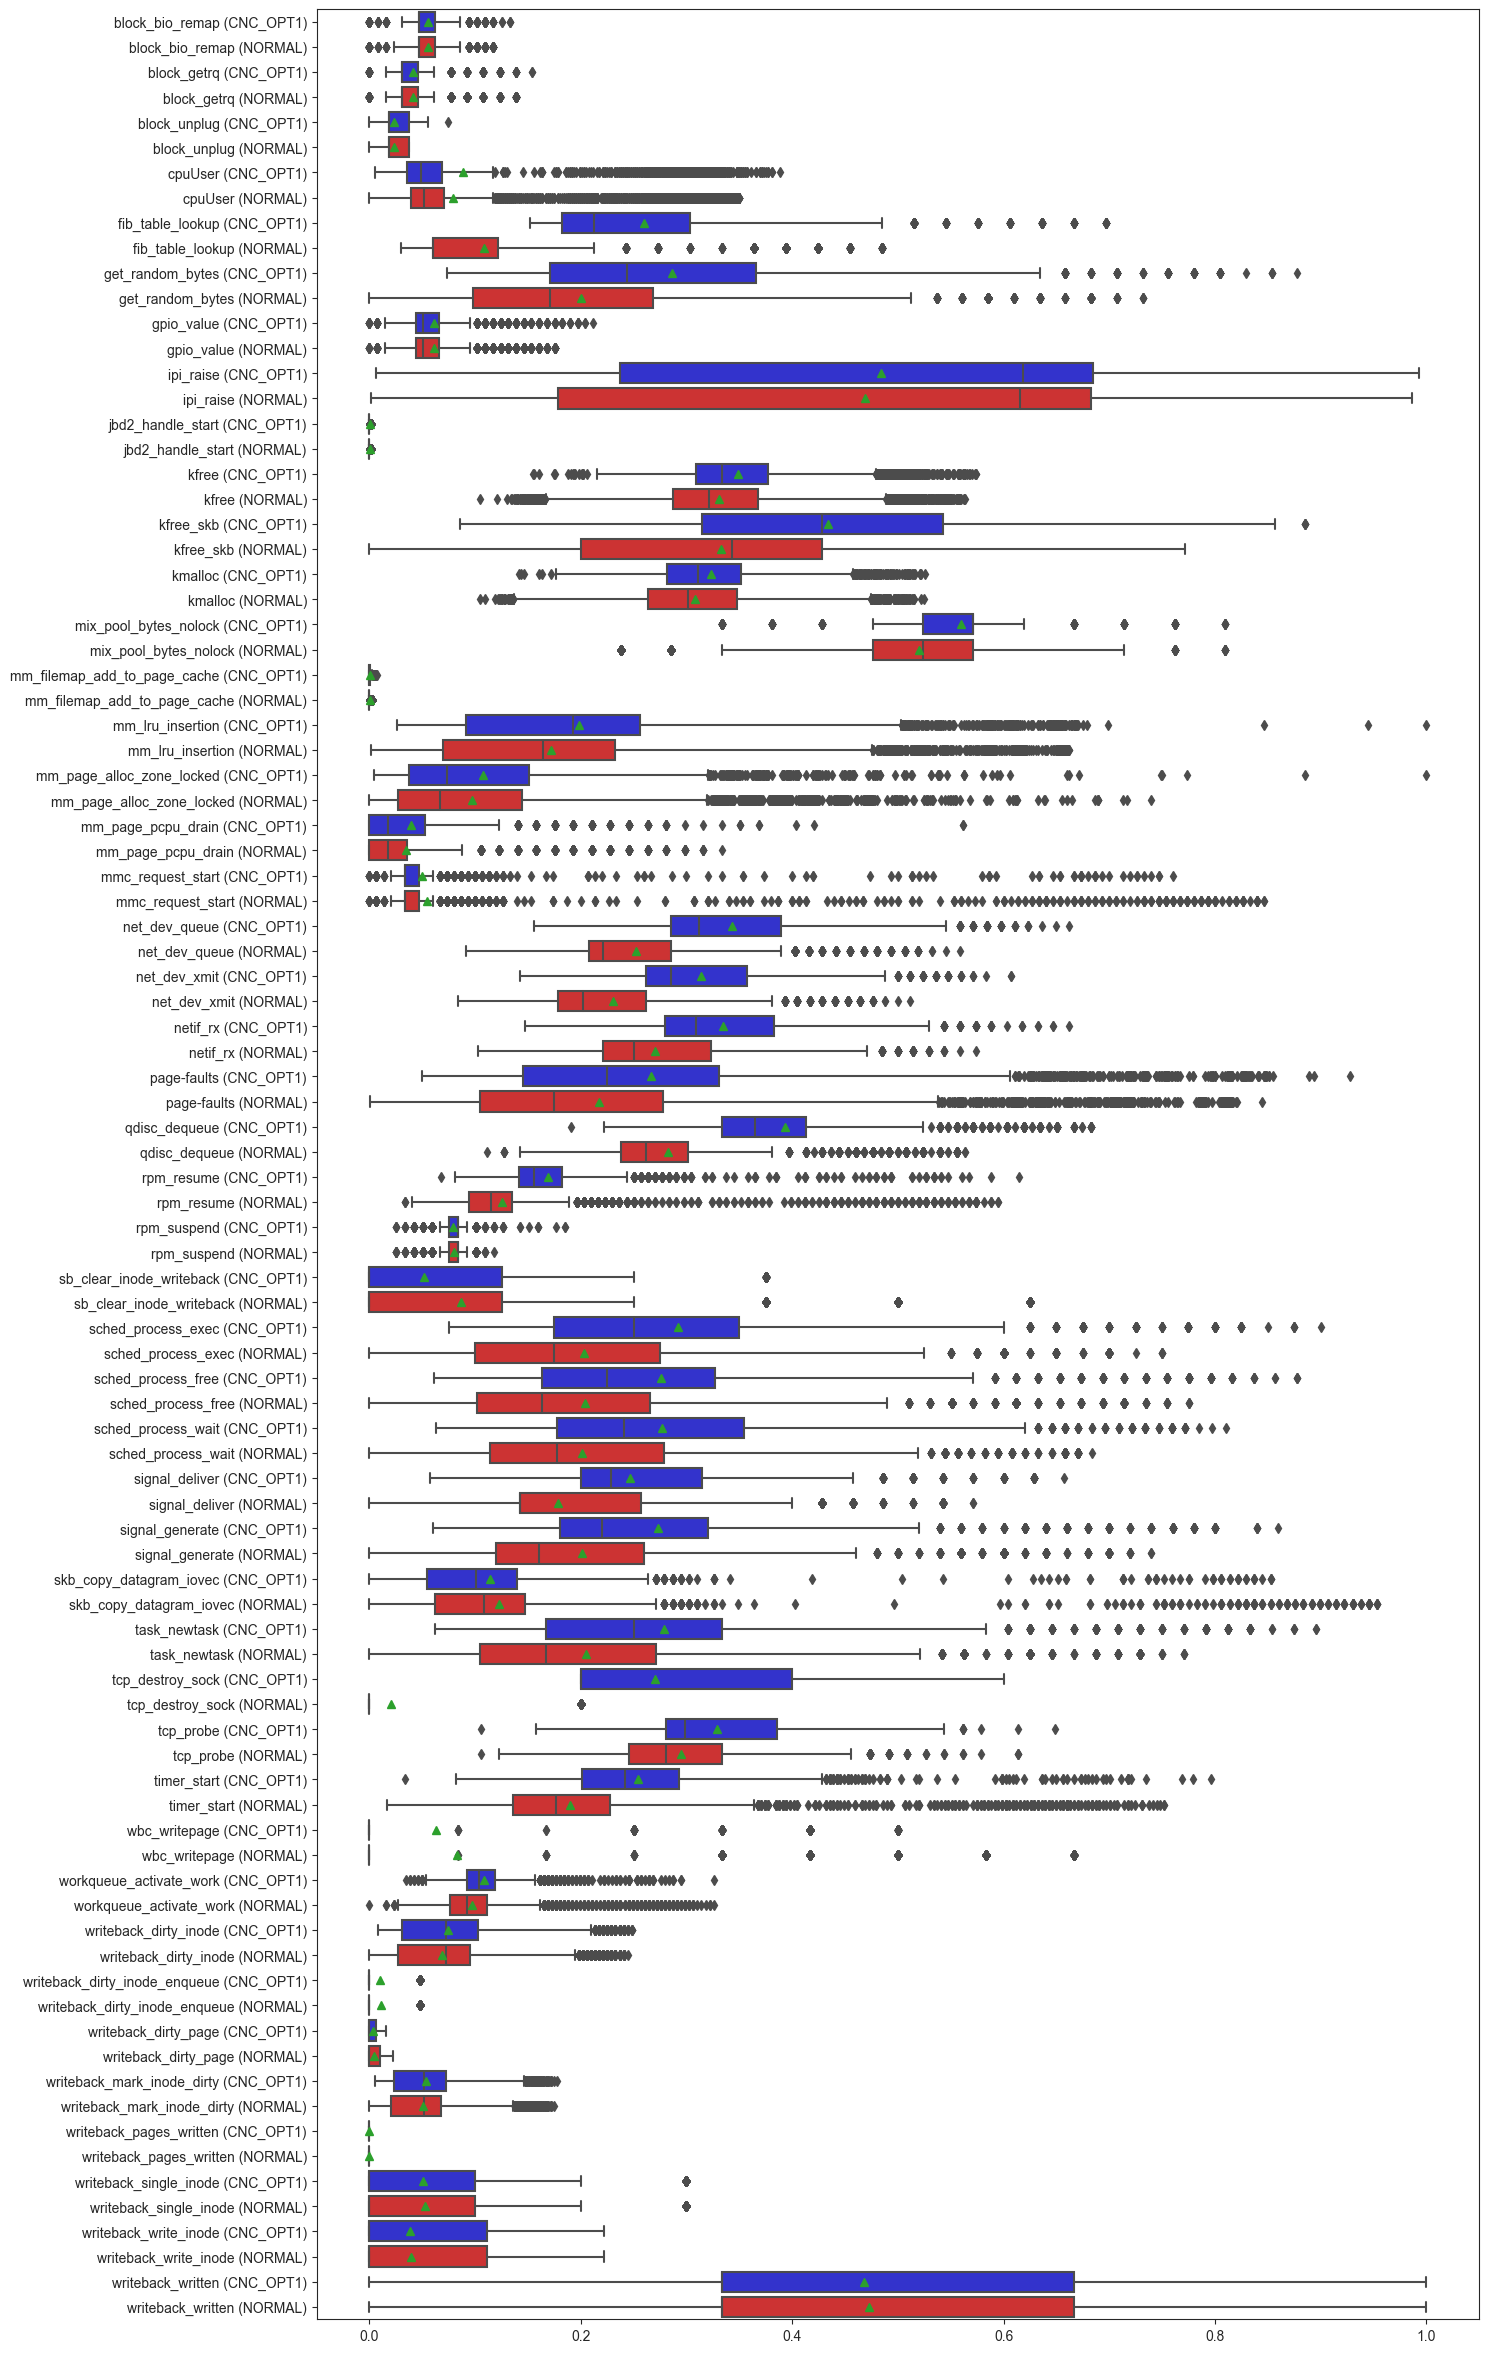

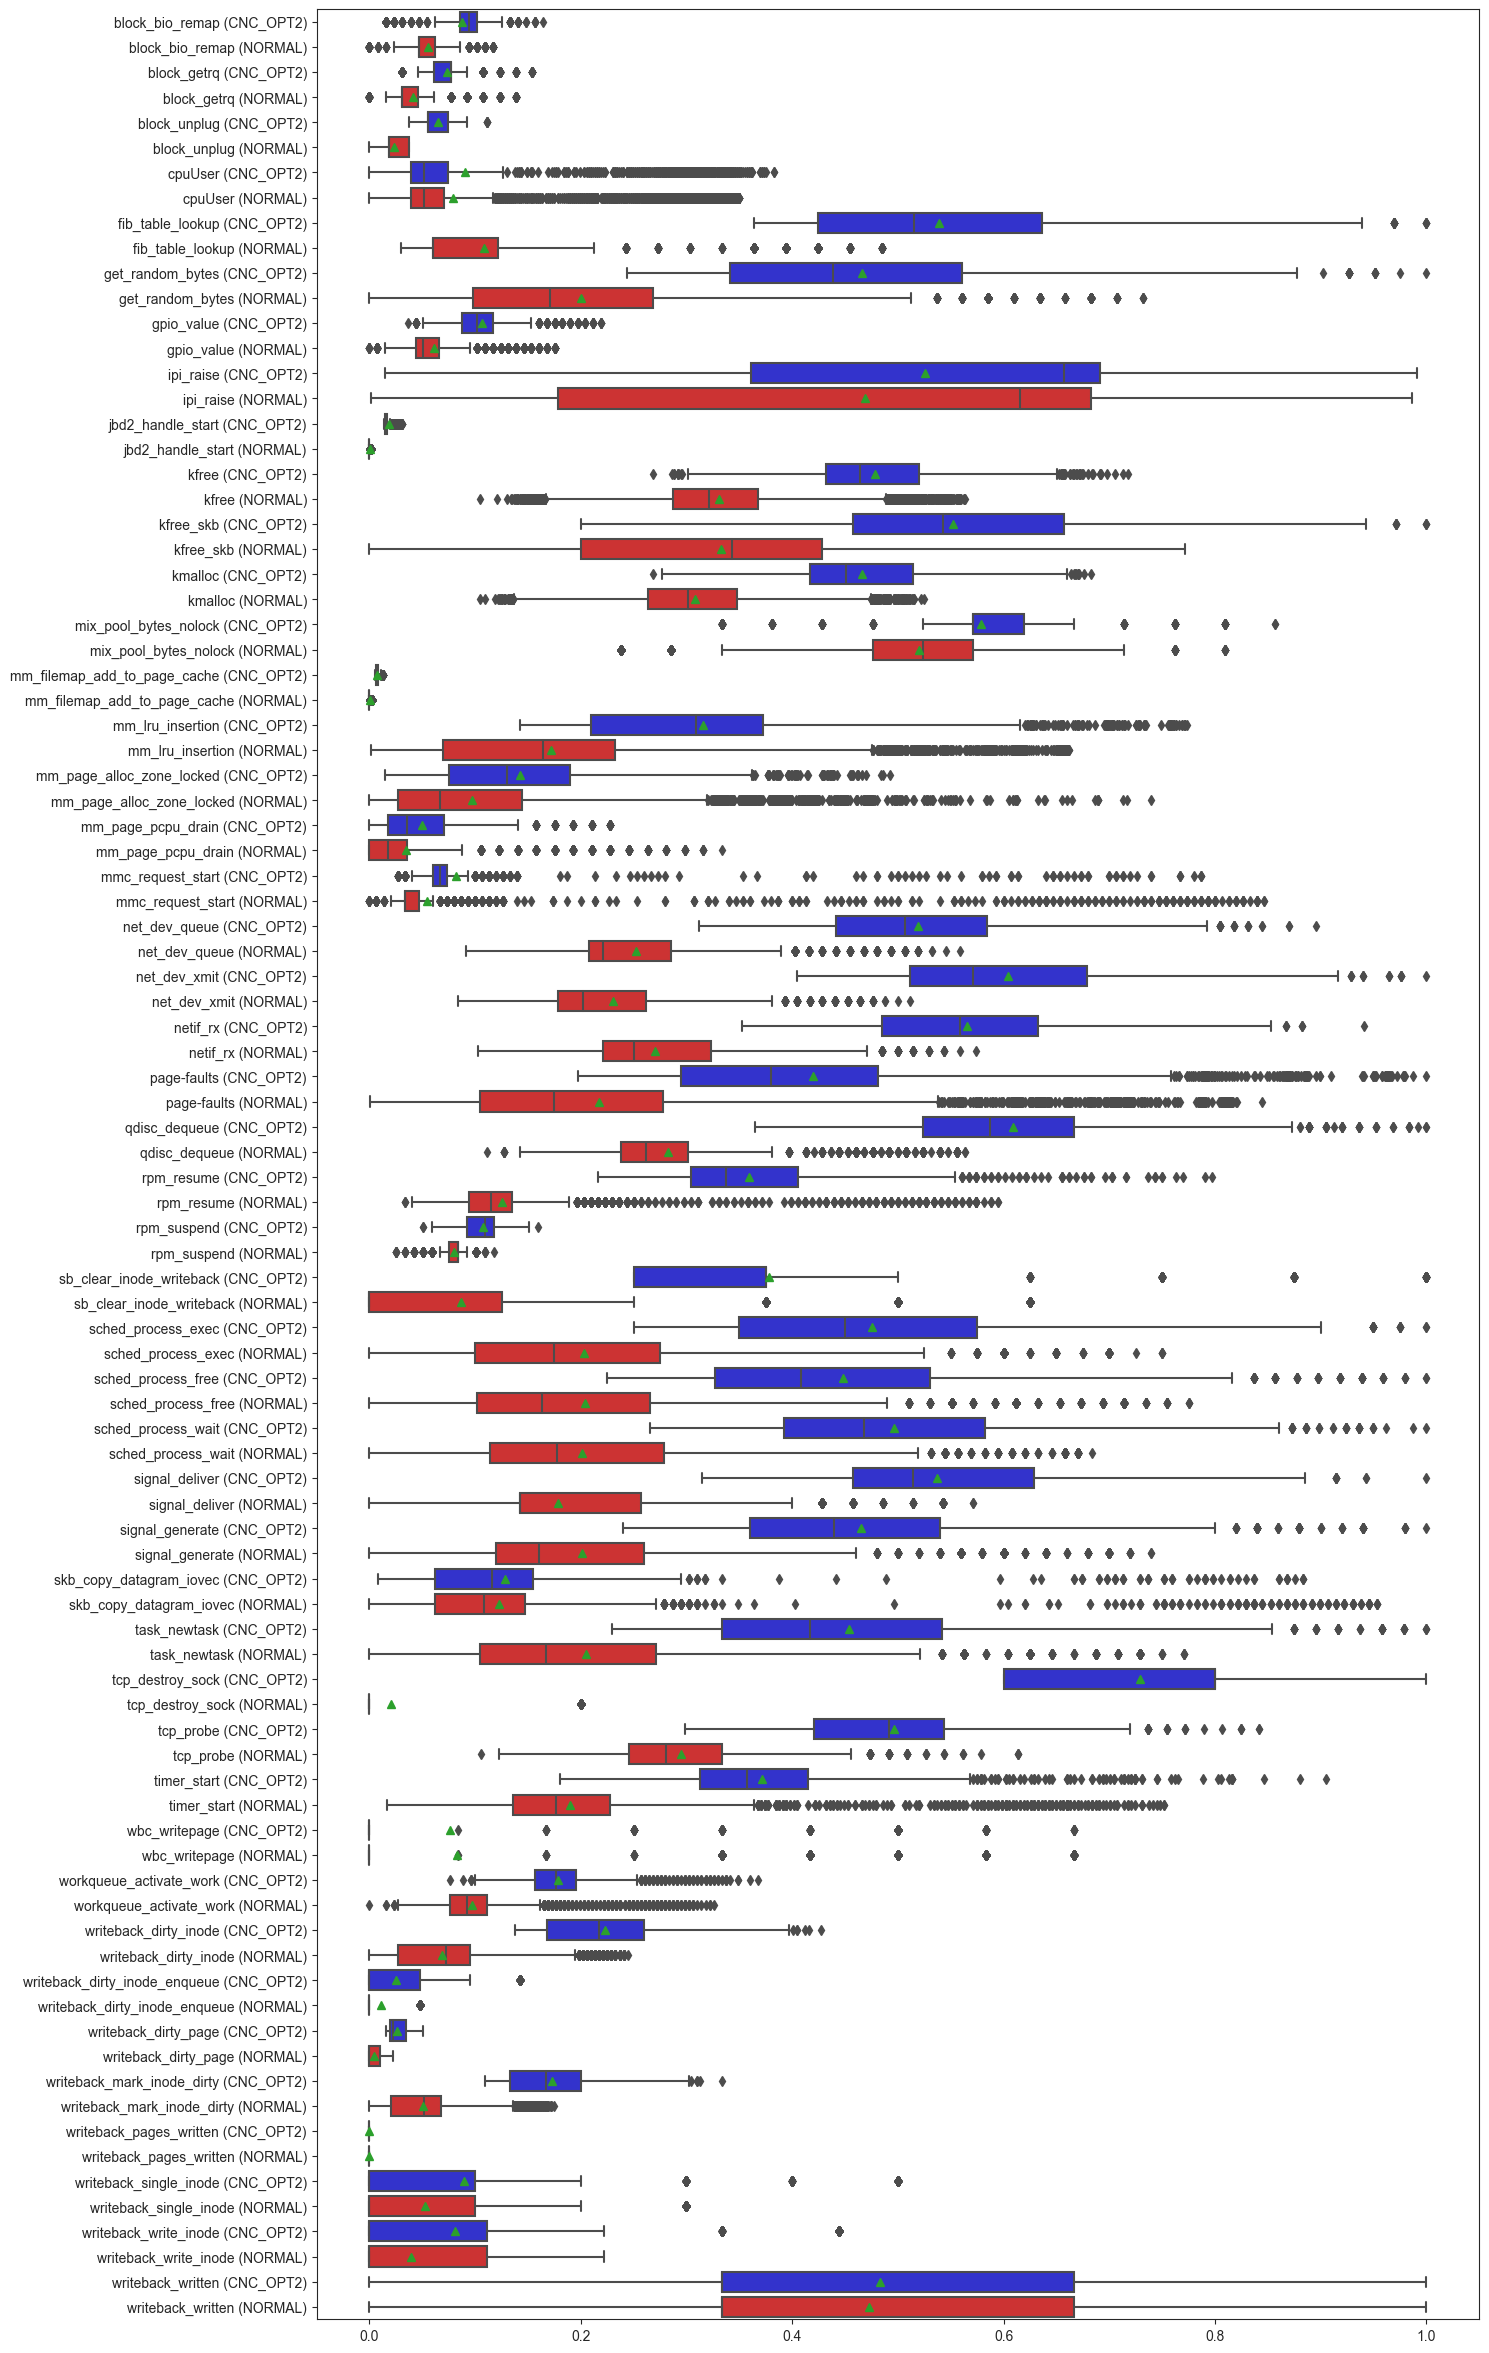

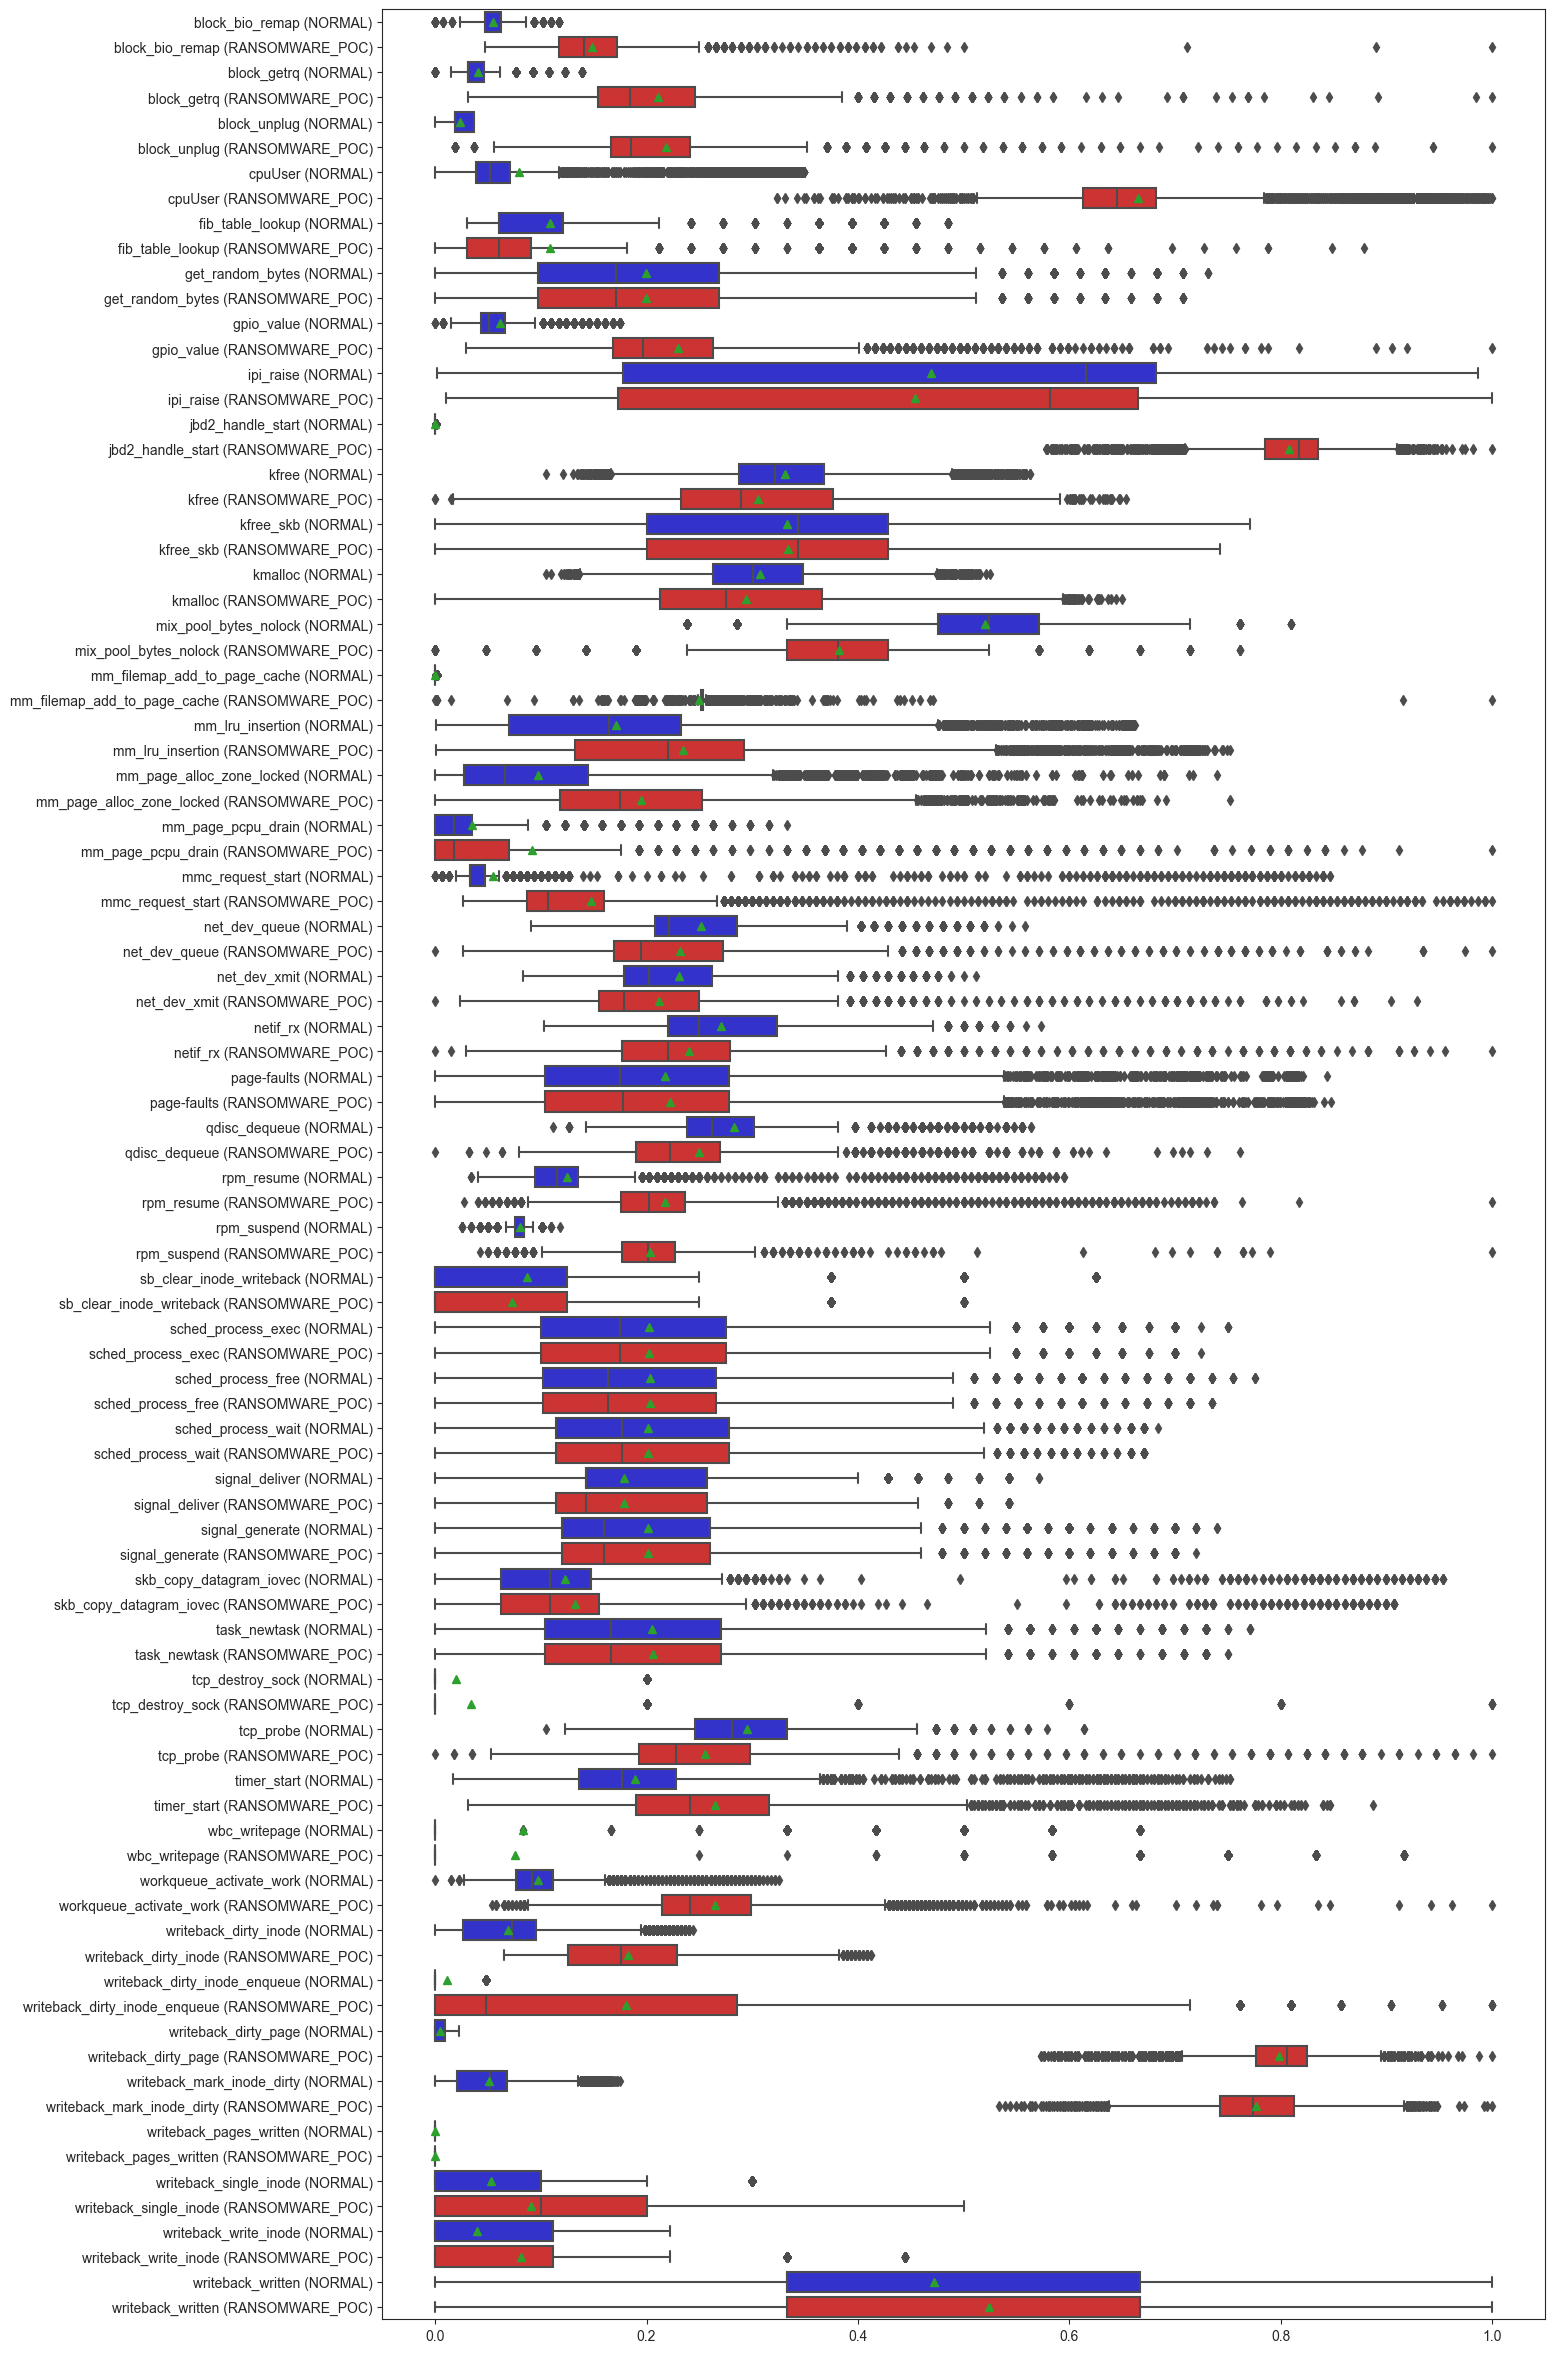

In [162]:
for behavior in Behavior:
    if behavior == Behavior.NORMAL:
        continue
    comparison_box_plot(training_data, Behavior.NORMAL, behavior, color_a='blue', color_b='red', plot='boxplot')